In [15]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import transpile, schedule as build_schedule
from qiskit.pulse import Waveform, Play, DriveChannel, Schedule, GaussianSquare, ShiftPhase
from qiskit.pulse.macros import measure_all
from qiskit.visualization.pulse.qcstyle import SchedStyle
from qiskit.test.mock import FakeArmonk, FakeAlmaden

In [2]:
backend =FakeArmonk()
props = backend.properties()
def describe_qubit(qubit, properties):
    """Print a string describing some of reported properties of the given qubit."""

    # Conversion factors from standard SI units
    us = 1e6
    ns = 1e9
    GHz = 1e-9

    print("Qubit {0} has a \n"
          "  - T1 time of {1} microseconds\n"
          "  - T2 time of {2} microseconds\n"
          "  - U2 gate error of {3}\n"
          "  - U2 gate duration of {4} nanoseconds\n"
          "  - resonant frequency of {5} GHz".format(
              qubit,
              properties.t1(qubit) * us,
              properties.t2(qubit) * us,
              properties.gate_error('u2', qubit),
              properties.gate_length('u2', qubit) * ns,
              properties.frequency(qubit) * GHz))

describe_qubit(0, props)

Qubit 0 has a 
  - T1 time of 218.39438598408128 microseconds
  - T2 time of 222.41807174432898 microseconds
  - U2 gate error of 0.000359326734139894
  - U2 gate duration of 142.22222222222223 nanoseconds
  - resonant frequency of 4.974452200122868 GHz


In [58]:
cmap_list = backend.configuration().coupling_map

In [64]:
cmap_lst_of_sets = []
for qb_pair in cmap_list:
    if set(qb_pair) not in cmap_lst_of_sets:
        cmap_lst_of_sets.append(set(qb_pair))
cmap_lst_of_sets

[{0, 1},
 {1, 2},
 {1, 6},
 {2, 3},
 {3, 4},
 {3, 8},
 {5, 6},
 {5, 10},
 {6, 7},
 {7, 8},
 {7, 12},
 {8, 9},
 {9, 14},
 {10, 11},
 {11, 12},
 {11, 16},
 {12, 13},
 {13, 14},
 {13, 18},
 {15, 16},
 {16, 17},
 {17, 18},
 {18, 19}]

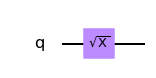

In [51]:
circ = QuantumCircuit(1)
#circ.h(0)
#circ.cx(0,1)
#circ.cx(1,2)
circ.sx(0)
#circ.measure_all()
circ.draw('mpl')

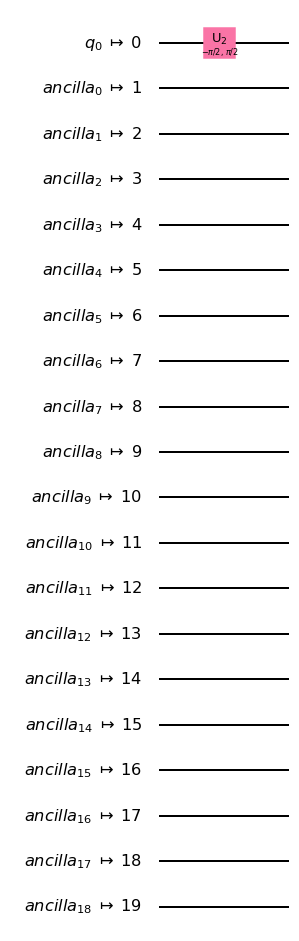

In [52]:
backend =FakeAlmaden()
transpiled_circ = transpile(circ, backend)
transpiled_circ.draw('mpl')

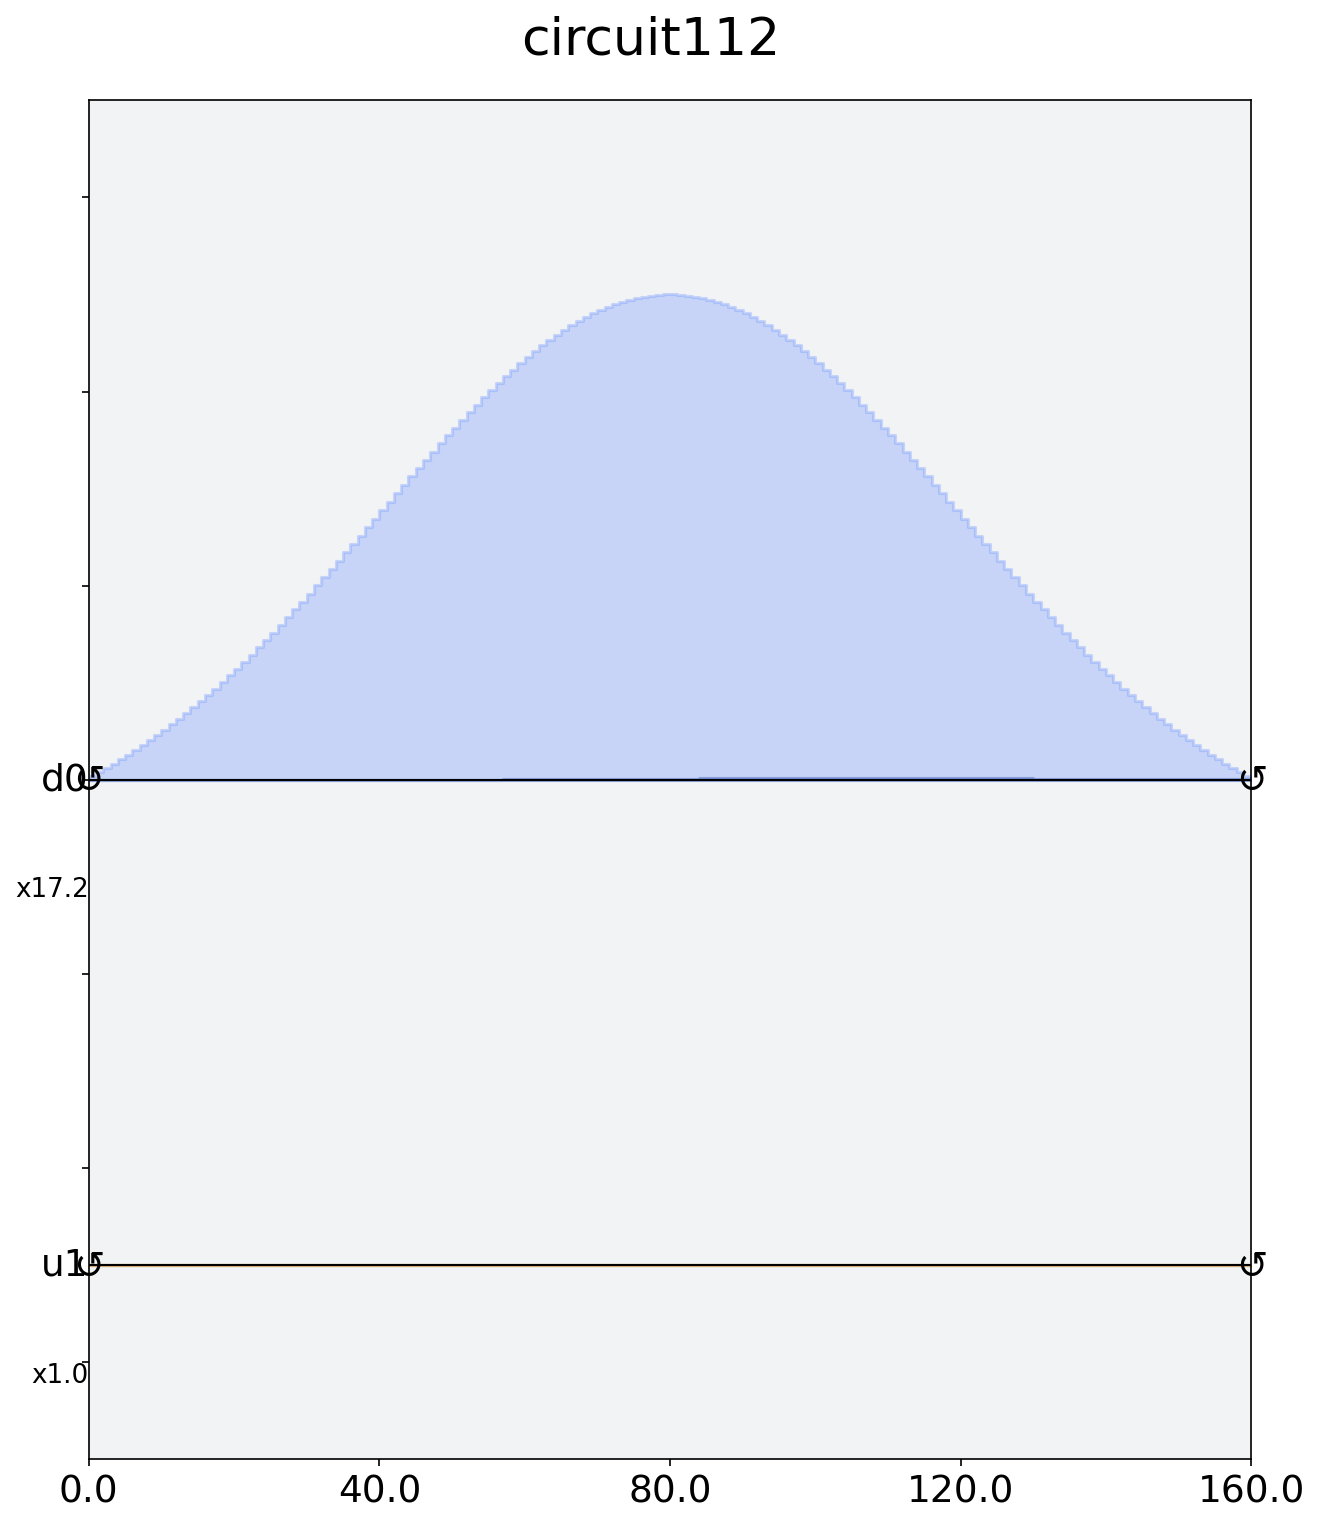

In [53]:
schedule = build_schedule(transpiled_circ, backend)
#schedule.draw(plot_range=[0,2500])
schedule.draw()

In [54]:
schedule

Schedule((0, ShiftPhase(-1.5707963267948966, DriveChannel(0))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(1))), (0, Play(Waveform(array([ 4.50241641e-05+0.00045301j,  4.57098831e-05+0.00092305j,
        4.63826946e-05+0.00141047j,  4.70399682e-05+0.00191552j,
        4.76789719e-05+0.00243842j,  4.82968535e-05+0.00297938j,
        4.88906480e-05+0.00353856j,  4.94572887e-05+0.00411611j,
        4.99936068e-05+0.00471216j,  5.04963427e-05+0.00532679j,
        5.09621350e-05+0.00596006j,  5.13875711e-05+0.00661199j,
        5.17691187e-05+0.00728257j,  5.21032052e-05+0.00797177j,
        5.23862000e-05+0.00867948j,  5.26143958e-05+0.0094056j ,
        5.27840966e-05+0.01014996j,  5.28915189e-05+0.01091234j,
        5.29328972e-05+0.01169251j,  5.29044410e-05+0.01249018j,
        5.28023811e-05+0.013305j  ,  5.26229596e-05+0.0141366j ,
        5.23624331e-05+0.01498454j,  5.20171343e-05+0.01584836j,
        5.15834217e-05+0.01672752j,  5.10577593e-05+0.01762146j,
        5.043665

In [6]:
a = np.array([ 2.45862314e-03+0.00045668j,  2.50128261e-03+0.00100554j,
        2.54421984e-03+0.00155953j,  2.58743390e-03+0.00211868j,
        2.63092411e-03+0.002683j  ,  2.67468928e-03+0.00325252j,
        2.71872850e-03+0.00382724j,  2.76304106e-03+0.00440721j,
        2.80762557e-03+0.00499242j,  2.85248109e-03+0.0055829j ,
        2.89760670e-03+0.00617868j,  2.94300099e-03+0.00677976j,
        2.98866257e-03+0.00738616j,  3.03459028e-03+0.0079979j ,
        3.08078295e-03+0.008615j  ,  3.12723918e-03+0.00923747j,
        3.17395735e-03+0.00986533j,  3.22093605e-03+0.01049859j,
        3.26817343e-03+0.01113727j,  3.31566879e-03+0.01178138j,
        3.36341979e-03+0.01243094j,  3.41142458e-03+0.01308596j,
        3.45968176e-03+0.01374644j,  3.50818969e-03+0.01441241j,
        3.55694629e-03+0.01508388j,  3.60594946e-03+0.01576085j,
        3.65519733e-03+0.01644334j,  3.70468851e-03+0.01713135j,
        3.75441997e-03+0.0178249j ,  3.80439055e-03+0.018524j  ,
        3.85459722e-03+0.01922865j,  3.90503788e-03+0.01993887j,
        3.95571068e-03+0.02065465j,  4.00661351e-03+0.02137601j,
        4.05774312e-03+0.02210295j,  4.10909811e-03+0.02283548j,
        4.16067475e-03+0.02357361j,  4.21247166e-03+0.02431733j,
        4.26448556e-03+0.02506665j,  4.31671366e-03+0.02582158j,
        4.36915364e-03+0.02658212j,  4.42180270e-03+0.02734826j,
        4.47465759e-03+0.02812002j,  4.52771643e-03+0.02889739j,
        4.58097551e-03+0.02968036j,  4.63443156e-03+0.03046895j,
        4.68808226e-03+0.03126315j,  4.74192342e-03+0.03206296j,
        4.79595317e-03+0.03286837j,  4.85016778e-03+0.03367938j,
        4.90456400e-03+0.03449599j,  4.95913811e-03+0.03531819j,
        5.01388684e-03+0.03614598j,  5.06880786e-03+0.03697935j,
        5.12389606e-03+0.03781829j,  5.17914910e-03+0.03866281j,
        5.23456279e-03+0.03951288j,  5.29013295e-03+0.04036849j,
        5.34585677e-03+0.04122965j,  5.40173100e-03+0.04209633j,
        5.45775052e-03+0.04296854j,  5.51391114e-03+0.04384625j,
        5.57021098e-03+0.04472945j,  5.62664447e-03+0.04561812j,
        5.68320742e-03+0.04651226j,  5.73989749e-03+0.04741186j,
        5.79670817e-03+0.04831688j,  5.85363666e-03+0.04922732j,
        5.91067877e-03+0.05014316j,  5.96782938e-03+0.05106437j,
        6.02508523e-03+0.05199095j,  6.08244026e-03+0.05292286j,
        6.13989215e-03+0.0538601j ,  6.19743532e-03+0.05480263j,
        6.25506509e-03+0.05575045j,  6.31277636e-03+0.05670351j,
        6.37056585e-03+0.0576618j ,  6.42842799e-03+0.05862529j,
        6.48635812e-03+0.05959395j,  6.54435158e-03+0.06056777j,
        6.60240278e-03+0.06154671j,  6.66050799e-03+0.06253074j,
        6.71866070e-03+0.06351983j,  6.77685812e-03+0.06451397j,
        6.83509372e-03+0.06551308j,  6.89336192e-03+0.06651719j,
        6.95165992e-03+0.06752623j,  7.00998027e-03+0.06854017j,
        7.06831831e-03+0.06955898j,  7.12666893e-03+0.07058262j,
        7.18502700e-03+0.07161105j,  7.24338647e-03+0.07264425j,
        7.30174314e-03+0.07368217j,  7.36009050e-03+0.07472478j,
        7.41842436e-03+0.07577201j,  7.47673772e-03+0.07682386j,
        7.53502548e-03+0.07788025j,  7.59328250e-03+0.07894117j,
        7.65150273e-03+0.08000656j,  7.70968106e-03+0.08107638j,
        7.76781095e-03+0.08215057j,  7.82588776e-03+0.08322911j,
        7.88390450e-03+0.08431193j,  7.94185512e-03+0.08539899j,
        7.99973588e-03+0.08649024j,  8.05754028e-03+0.08758564j,
        8.11525993e-03+0.08868513j,  8.17289203e-03+0.08978865j,
        8.23042821e-03+0.09089615j,  8.28786474e-03+0.09200759j,
        8.34519323e-03+0.09312291j,  8.40240996e-03+0.09424204j,
        8.45950656e-03+0.09536494j,  8.51647928e-03+0.09649155j,
        8.57332069e-03+0.09762181j,  8.63002427e-03+0.09875565j,
        8.68658442e-03+0.09989303j,  8.74299556e-03+0.10103387j,
        8.79924931e-03+0.10217813j,  8.85534286e-03+0.10332572j,
        8.91126692e-03+0.1044766j ,  8.96701589e-03+0.1056307j ,
        9.02258512e-03+0.10678793j,  9.07796621e-03+0.10794827j,
        9.13315360e-03+0.10911162j,  9.18814167e-03+0.11027791j,
        9.24292207e-03+0.11144709j,  9.29749198e-03+0.11261908j,
        9.35184117e-03+0.11379381j,  9.40596499e-03+0.11497121j,
        9.45985783e-03+0.1161512j ,  9.51351225e-03+0.11733371j,
        9.56692267e-03+0.11851868j,  9.62008163e-03+0.11970601j,
        9.67298262e-03+0.12089565j,  9.72562097e-03+0.12208752j,
        9.77798738e-03+0.12328152j,  9.83007811e-03+0.1244776j ,
        9.88188665e-03+0.12567566j,  9.93340462e-03+0.12687562j,
        9.98462737e-03+0.12807742j,  1.00355465e-02+0.12928095j,
        1.00861583e-02+0.13048618j,  1.01364534e-02+0.13169295j,
        1.01864282e-02+0.13290122j,  1.02360742e-02+0.13411093j,
        1.02853868e-02+0.13532194j,  1.03343586e-02+0.13653423j,
        1.03829838e-02+0.13774765j,  1.04312543e-02+0.13896213j,
        1.04791652e-02+0.14017761j,  1.05267111e-02+0.14139396j,
        1.05738845e-02+0.14261113j,  1.06206778e-02+0.143829j  ,
        1.06670875e-02+0.14504752j,  1.07131060e-02+0.14626653j,
        1.07587278e-02+0.147486j  ,  1.08039454e-02+0.14870583j,
        1.08487532e-02+0.14992589j,  1.08931456e-02+0.15114611j,
        1.09371170e-02+0.1523664j ,  1.09806582e-02+0.15358663j,
        1.10237654e-02+0.15480675j,  1.10664340e-02+0.15602665j,
        1.11086564e-02+0.15724623j,  1.11504262e-02+0.15846539j,
        1.11917369e-02+0.15968403j,  1.12325856e-02+0.16090205j,
        1.12729631e-02+0.16211936j,  1.13128666e-02+0.16333586j,
        1.13522867e-02+0.16455142j,  1.13912206e-02+0.16576599j,
        1.14296619e-02+0.16697943j,  1.14676040e-02+0.16819167j,
        1.15050431e-02+0.16940258j,  1.15419719e-02+0.17061207j,
        1.15783848e-02+0.17182001j,  1.16142780e-02+0.17302635j,
        1.16496440e-02+0.17423095j,  1.16844792e-02+0.17543371j,
        1.17187779e-02+0.17663455j,  1.17525328e-02+0.17783333j,
        1.17857419e-02+0.17902994j,  1.18183978e-02+0.18022431j,
        1.18504968e-02+0.18141633j,  1.18820313e-02+0.18260586j,
        1.19129997e-02+0.18379284j,  1.19433962e-02+0.18497713j,
        1.19732134e-02+0.18615863j,  1.20024495e-02+0.18733723j,
        1.20310970e-02+0.18851285j,  1.20591540e-02+0.18968536j,
        1.20866131e-02+0.19085462j,  1.21134724e-02+0.19202058j,
        1.21397255e-02+0.19318309j,  1.21653695e-02+0.19434209j,
        1.21903978e-02+0.19549744j,  1.22148087e-02+0.19664901j,
        1.22385975e-02+0.19779673j,  1.22617576e-02+0.1989405j ,
        1.22842863e-02+0.20008014j,  1.23061817e-02+0.20121562j,
        1.23274364e-02+0.20234679j,  1.23480493e-02+0.20347357j,
        1.23680150e-02+0.20459583j,  1.23873316e-02+0.20571348j,
        1.24059925e-02+0.20682636j,  1.24239977e-02+0.20793442j,
        1.24413408e-02+0.20903756j,  1.24580199e-02+0.21013561j,
        1.24740312e-02+0.2112285j ,  1.24893710e-02+0.21231613j,
        1.25040375e-02+0.21339837j,  1.25180278e-02+0.21447514j,
        1.25313364e-02+0.2155463j ,  1.25439633e-02+0.21661176j,
        1.25559038e-02+0.21767139j,  1.25671569e-02+0.21872514j,
        1.25777181e-02+0.21977285j,  1.25875864e-02+0.22081444j,
        1.25967581e-02+0.2218498j ,  1.26052313e-02+0.2228788j ,
        1.26130059e-02+0.22390136j,  1.26200765e-02+0.2249174j ,
        1.26264431e-02+0.22592676j,  1.26321018e-02+0.2269294j ,
        1.26370527e-02+0.22792512j,  1.26412939e-02+0.22891392j,
        1.26448218e-02+0.22989565j,  1.26476353e-02+0.23087019j,
        1.26497354e-02+0.23183747j,  1.26511184e-02+0.23279738j,
        1.26517843e-02+0.23374982j,  1.26517285e-02+0.23469467j,
        1.26509536e-02+0.23563187j,  1.26494598e-02+0.23656128j,
        1.26472423e-02+0.23748285j,  1.26443012e-02+0.23839641j,
        1.26406364e-02+0.23930192j,  1.26362490e-02+0.24019927j,
        1.26311351e-02+0.24108835j,  1.26252975e-02+0.24196908j,
        1.26187336e-02+0.24284136j,  1.26114432e-02+0.24370508j,
        1.26034273e-02+0.2445602j ,  1.25946868e-02+0.24540657j,
        1.25852190e-02+0.24624412j,  1.25750257e-02+0.24707274j,
        1.25641087e-02+0.24789238j,  1.25524653e-02+0.24870293j,
        1.25400983e-02+0.24950428j,  1.25270067e-02+0.25029638j,
        1.25131924e-02+0.25107911j,  1.24986554e-02+0.25185239j,
        1.24833984e-02+0.25261617j,  1.24674197e-02+0.25337031j,
        1.24507211e-02+0.25411475j,  1.24333063e-02+0.25484943j,
        1.24151725e-02+0.25557426j,  1.23963254e-02+0.25628915j,
        1.23767629e-02+0.25699398j,  1.23564899e-02+0.25768876j,
        1.23355044e-02+0.25837332j,  1.23138111e-02+0.25904766j,
        1.22914100e-02+0.25971162j,  1.22683048e-02+0.26036522j,
        1.22444974e-02+0.26100835j,  1.22199887e-02+0.26164091j,
        1.21947825e-02+0.26226288j,  1.21688806e-02+0.26287416j,
        1.21422848e-02+0.26347461j,  1.21149989e-02+0.26406431j,
        1.20870238e-02+0.26464304j,  1.20583642e-02+0.26521087j,
        1.20290229e-02+0.26576763j,  1.19990017e-02+0.26631331j,
        1.19683053e-02+0.26684788j,  1.19369347e-02+0.26737118j,
        1.19048953e-02+0.26788324j,  1.18721891e-02+0.26838398j,
        1.18388217e-02+0.2688733j ,  1.18047930e-02+0.26935121j,
        1.17701087e-02+0.26981759j,  1.17347725e-02+0.27027243j,
        1.16987899e-02+0.27071565j,  1.16621619e-02+0.27114725j,
        1.16248941e-02+0.27156714j,  1.15869902e-02+0.27197522j,
        1.15484549e-02+0.27237153j,  1.15092918e-02+0.27275601j,
        1.14695048e-02+0.27312857j,  1.14291012e-02+0.27348924j,
        1.13880821e-02+0.27383792j,  1.13464538e-02+0.27417451j,
        1.13042202e-02+0.27449912j,  1.12613868e-02+0.27481163j,
        1.12179583e-02+0.27511194j,  1.11739403e-02+0.27540016j,
        1.11293364e-02+0.27567616j,  1.10841524e-02+0.27593991j,
        1.10383946e-02+0.27619144j,  1.09920651e-02+0.27643067j,
        1.09451730e-02+0.27665755j,  1.08977221e-02+0.2768721j ,
        1.08497171e-02+0.27707425j,  1.08011654e-02+0.27726406j,
        1.07520707e-02+0.27744141j,  1.07024396e-02+0.27760631j,
        1.06522795e-02+0.27775884j,  1.06015923e-02+0.27789882j,
        1.05503872e-02+0.27802631j,  1.04986690e-02+0.27814132j,
        1.04464442e-02+0.27824381j,  1.03937173e-02+0.27833375j,
        1.03404978e-02+0.27841115j,  1.02867894e-02+0.27847603j,
        1.02325985e-02+0.27852833j,  1.01779308e-02+0.27856806j,
        1.01227965e-02+0.27859521j,  1.00671966e-02+0.27860981j,
        1.00111421e-02+0.27861184j,  9.95463692e-03+0.27860129j,
        9.89768840e-03+0.27857813j,  9.84030496e-03+0.27854246j,
        9.78248939e-03+0.27849421j,  9.72425286e-03+0.27843338j,
        9.66559816e-03+0.27835998j,  9.60653648e-03+0.27827409j,
        9.54706967e-03+0.27817559j,  9.48720984e-03+0.27806464j,
        9.42695979e-03+0.27794114j,  9.36632976e-03+0.27780515j,
        9.30532347e-03+0.27765667j,  9.24395211e-03+0.27749577j,
        9.18221939e-03+0.27732241j,  9.12013371e-03+0.27713659j,
        9.05770250e-03+0.27693838j,  8.99493322e-03+0.27672783j,
        8.93183239e-03+0.27650487j,  8.86840746e-03+0.27626964j,
        8.80466588e-03+0.27602205j,  8.74061510e-03+0.27576223j,
        8.67626350e-03+0.27549016j,  8.61161668e-03+0.27520588j,
        8.54668394e-03+0.27490944j,  8.48147087e-03+0.2746008j ,
        8.41598585e-03+0.27428013j,  8.35023634e-03+0.27394736j,
        8.28422979e-03+0.27360255j,  8.21797270e-03+0.27324575j,
        8.15147534e-03+0.27287701j,  8.08474328e-03+0.27249634j,
        8.01778398e-03+0.27210385j,  7.95060489e-03+0.27169952j,
        7.88321439e-03+0.27128339j,  7.81561993e-03+0.27085561j,
        7.74782849e-03+0.27041608j,  7.67984940e-03+0.26996499j,
        7.61168823e-03+0.26950231j,  7.54335383e-03+0.2690281j ,
        7.47485226e-03+0.26854241j,  7.40619237e-03+0.26804537j,
        7.33738206e-03+0.26753694j,  7.26842880e-03+0.26701722j,
        7.19933910e-03+0.26648629j,  7.13012088e-03+0.26594418j,
        7.06078298e-03+0.26539093j,  6.99133147e-03+0.26482669j,
        6.92177471e-03+0.26425141j,  6.85211923e-03+0.26366523j,
        6.78237341e-03+0.26306823j,  6.71254471e-03+0.26246041j,
        6.64264057e-03+0.26184189j,  6.57266844e-03+0.26121274j,
        6.50263531e-03+0.260573j  ,  6.43254910e-03+0.25992274j,
        6.36241771e-03+0.25926211j,  6.29224721e-03+0.25859106j,
        6.22204691e-03+0.25790977j,  6.15182146e-03+0.25721827j,
        6.08158018e-03+0.25651667j,  6.01132959e-03+0.25580499j,
        5.94107714e-03+0.25508338j,  5.87082980e-03+0.25435185j,
        5.80059551e-03+0.25361052j,  5.73038030e-03+0.25285947j,
        5.66019211e-03+0.2520988j ,  5.59003698e-03+0.25132856j,
        5.51992375e-03+0.25054887j,  5.44985756e-03+0.24975978j,
        5.37984725e-03+0.24896137j,  5.30989747e-03+0.24815378j,
        5.24001662e-03+0.24733706j,  5.17021120e-03+0.2465113j ,
        5.10048866e-03+0.24567661j,  5.03085461e-03+0.24483307j,
        4.96131554e-03+0.24398075j,  4.89188032e-03+0.24311978j,
        4.82255267e-03+0.24225023j,  4.75334190e-03+0.24137221j,
        4.68425173e-03+0.24048579j,  4.61528962e-03+0.23959109j,
        4.54646442e-03+0.2386882j ,  4.47777938e-03+0.2377772j ,
        4.40924102e-03+0.2368582j ,  4.34085680e-03+0.23593129j,
        4.27263370e-03+0.2349966j ,  4.20457544e-03+0.23405419j,
        4.13668994e-03+0.23310417j,  4.06898186e-03+0.23214667j,
        4.00145818e-03+0.23118174j,  3.93412495e-03+0.23020953j,
        3.86698777e-03+0.22923009j,  3.80005129e-03+0.22824356j,
        3.73332202e-03+0.22725004j,  3.66680557e-03+0.22624961j,
        3.60050844e-03+0.22524239j,  3.53443483e-03+0.2242285j ,
        3.46859125e-03+0.22320803j,  3.40298330e-03+0.22218108j,
        3.33761470e-03+0.22114775j,  3.27249197e-03+0.22010815j,
        3.20761884e-03+0.21906239j,  3.14300228e-03+0.21801057j,
        3.07864696e-03+0.21695282j,  3.01455706e-03+0.2158892j ,
        2.95073772e-03+0.21481986j,  2.88719358e-03+0.21374488j,
        2.82393023e-03+0.2126644j ,  2.76095234e-03+0.2115785j ,
        2.69826408e-03+0.21048728j,  2.63586966e-03+0.20939086j,
        2.57377373e-03+0.20828937j,  2.51198187e-03+0.20718288j,
        2.45049689e-03+0.20607153j,  2.38932297e-03+0.2049554j ,
        2.32846569e-03+0.20383459j,  2.26792833e-03+0.20270927j,
        2.20771553e-03+0.20157951j,  2.14782963e-03+0.2004454j ,
        2.08827667e-03+0.19930707j,  2.02905899e-03+0.19816461j,
        1.97018031e-03+0.19701815j,  1.91164622e-03+0.19586782j,
        1.85345719e-03+0.19471367j,  1.79561879e-03+0.19355583j,
        1.73813431e-03+0.19239442j,  1.68100651e-03+0.19122957j,
        1.62423961e-03+0.19006135j,  1.56783545e-03+0.18888988j,
        1.51179777e-03+0.18771525j,  1.45613123e-03+0.18653759j,
        1.40083535e-03+0.18535702j,  1.34591619e-03+0.1841736j ,
        1.29137421e-03+0.18298748j,  1.23721408e-03+0.18179876j,
        1.18343765e-03+0.18060751j,  1.13004679e-03+0.17941388j,
        1.07704522e-03+0.17821799j,  1.02443481e-03+0.17701989j,
        9.72217880e-04+0.17581971j,  9.20396764e-04+0.17461754j,
        8.68973788e-04+0.17341354j,  8.17950349e-04+0.17220774j,
        7.67329708e-04+0.1710003j ,  7.17112795e-04+0.1697913j ,
        6.67302404e-04+0.16858083j,  6.17899001e-04+0.16736901j,
        5.68905380e-04+0.16615595j,  5.20323403e-04+0.16494174j,
        4.72154003e-04+0.16372648j,  4.24399506e-04+0.16251028j,
        3.77059914e-04+0.16129321j,  3.30137555e-04+0.1600754j ,
        2.83633359e-04+0.15885696j,  2.37549655e-04+0.15763795j,
        1.91885978e-04+0.15641849j,  1.46644656e-04+0.15519868j,
        1.01825688e-04+0.15397862j,  5.74304722e-05+0.15275842j,
        1.34599395e-05+0.15153813j, -3.00849788e-05+0.15031788j,
       -7.32038170e-05+0.14909776j, -1.15897041e-04+0.14787784j,
       -1.58162322e-04+0.14665826j, -1.99998263e-04+0.14543909j,
       -2.41408125e-04+0.1442204j , -2.82388646e-04+0.14300232j,
       -3.22940294e-04+0.14178491j, -3.63062602e-04+0.14056829j,
       -4.02755570e-04+0.13935252j, -4.42020129e-04+0.1381377j ,
       -4.80854884e-04+0.13692392j, -5.19260298e-04+0.13571128j,
       -5.57236373e-04+0.13449985j, -5.94783109e-04+0.13328969j,
       -6.31901436e-04+0.13208097j, -6.68591354e-04+0.1308737j ,
       -7.04853330e-04+0.12966797j, -7.40686897e-04+0.12846389j,
       -7.76093919e-04+0.1272615j , -8.11073929e-04+0.12606095j,
       -8.45628325e-04+0.12486227j, -8.79756641e-04+0.12366555j,
       -9.13460273e-04+0.12247088j, -9.46740620e-04+0.12127832j,
       -9.79597680e-04+0.12008794j, -1.01203192e-03+0.11889987j,
       -1.04404567e-03+0.11771414j, -1.07563846e-03+0.11653082j,
       -1.10681308e-03+0.11535001j, -1.13756955e-03+0.11417177j,
       -1.16790785e-03+0.11299618j, -1.19783217e-03+0.1118233j ,
       -1.22734113e-03+0.11065321j, -1.25643704e-03+0.10948598j,
       -1.28512178e-03+0.10832168j, -1.31339603e-03+0.10716037j,
       -1.34126144e-03+0.10600214j, -1.36871939e-03+0.10484701j,
       -1.39577151e-03+0.10369511j, -1.42241991e-03+0.10254644j,
       -1.44866598e-03+0.10140111j, -1.47451088e-03+0.10025916j,
       -1.49995717e-03+0.09912067j, -1.52500626e-03+0.09798568j,
       -1.54966000e-03+0.09685425j, -1.57391978e-03+0.09572648j,
       -1.59778888e-03+0.09460238j, -1.62126753e-03+0.09348202j,
       -1.64435920e-03+0.09236547j, -1.66706485e-03+0.09125278j,
       -1.68938749e-03+0.09014402j, -1.71132782e-03+0.08903921j,
       -1.73289003e-03+0.08793843j, -1.75407459e-03+0.0868417j ,
       -1.77488429e-03+0.08574911j, -1.79532194e-03+0.08466071j,
       -1.81538891e-03+0.08357652j, -1.83508778e-03+0.08249659j,
       -1.85442087e-03+0.081421j  , -1.87339121e-03+0.08034977j,
       -1.89200067e-03+0.07928295j, -1.91025157e-03+0.07822059j,
       -1.92814623e-03+0.07716274j, -1.94568792e-03+0.07610943j,
       -1.96287781e-03+0.07506071j, -1.97972008e-03+0.07401661j,
       -1.99621706e-03+0.07297719j, -2.01237015e-03+0.07194247j,
       -2.02818261e-03+0.0709125j , -2.04365724e-03+0.06988731j,
       -2.05879682e-03+0.06886694j, -2.07360368e-03+0.06785143j,
       -2.08807993e-03+0.06684081j, -2.10222998e-03+0.06583513j,
       -2.11605523e-03+0.0648344j , -2.12955917e-03+0.06383865j,
       -2.14274414e-03+0.06284794j, -2.15561246e-03+0.06186229j,
       -2.16816855e-03+0.06088171j, -2.18041334e-03+0.05990624j,
       -2.19235104e-03+0.05893592j, -2.20398395e-03+0.05797077j,
       -2.21531466e-03+0.0570108j , -2.22634710e-03+0.05605606j,
       -2.23708292e-03+0.05510656j, -2.24752538e-03+0.05416233j,
       -2.25767819e-03+0.05322338j, -2.26754346e-03+0.05228976j,
       -2.27712467e-03+0.05136146j, -2.28642416e-03+0.05043852j,
       -2.29544519e-03+0.04952095j, -2.30419077e-03+0.04860878j,
       -2.31266418e-03+0.04770201j, -2.32086750e-03+0.04680067j,
       -2.32880423e-03+0.04590478j, -2.33647740e-03+0.04501435j,
       -2.34389002e-03+0.04412938j, -2.35104538e-03+0.04324991j,
       -2.35794578e-03+0.04237594j, -2.36459426e-03+0.04150748j,
       -2.37099454e-03+0.04064454j, -2.37714895e-03+0.03978715j,
       -2.38306052e-03+0.0389353j , -2.38873251e-03+0.038089j  ,
       -2.39416794e-03+0.03724826j, -2.39936938e-03+0.0364131j ,
       -2.40434054e-03+0.03558352j, -2.40908330e-03+0.03475953j,
       -2.41360208e-03+0.03394111j, -2.41789827e-03+0.0331283j ,
       -2.42197653e-03+0.03232109j, -2.42583826e-03+0.03151949j,
       -2.42948718e-03+0.03072349j, -2.43292656e-03+0.02993309j,
       -2.43615871e-03+0.02914831j, -2.43918668e-03+0.02836914j,
       -2.44201394e-03+0.02759559j, -2.44464283e-03+0.02682764j,
       -2.44707614e-03+0.0260653j , -2.44931760e-03+0.02530857j,
       -2.45136907e-03+0.02455745j, -2.45323428e-03+0.02381193j,
       -2.45491578e-03+0.02307201j, -2.45641638e-03+0.02233768j,
       -2.45773909e-03+0.02160894j, -2.45888648e-03+0.02088579j,
       -2.45986180e-03+0.02016821j, -2.46066763e-03+0.01945621j,
       -2.46130652e-03+0.01874977j, -2.46178149e-03+0.01804889j,
       -2.46209558e-03+0.01735356j, -2.46225088e-03+0.01666377j,
       -2.46225088e-03+0.0159795j , -2.46209791e-03+0.01530076j,
       -2.46179523e-03+0.01462753j, -2.46134447e-03+0.0139598j ,
       -2.46074912e-03+0.01329755j, -2.46001175e-03+0.01264078j,
       -2.45913514e-03+0.01198947j, -2.45812116e-03+0.01134361j,
       -2.45697354e-03+0.01070318j, -2.45569390e-03+0.01006818j,
       -2.45428551e-03+0.00943859j, -2.45275069e-03+0.00881439j,
       -2.45109200e-03+0.00819557j, -2.44931178e-03+0.00758211j,
       -2.44741305e-03+0.00697399j, -2.44539743e-03+0.0063712j ,
       -2.44326820e-03+0.00577373j, -2.44102767e-03+0.00518154j,
       -2.43867817e-03+0.00459464j, -2.43622158e-03+0.00401299j,
       -2.43366114e-03+0.00343658j, -2.43099895e-03+0.0028654j ,
       -2.42823735e-03+0.00229941j, -2.42537842e-03+0.0017386j ,
       -2.42242473e-03+0.00118296j, -2.41937861e-03+0.00063245j])

In [7]:
a.size

640

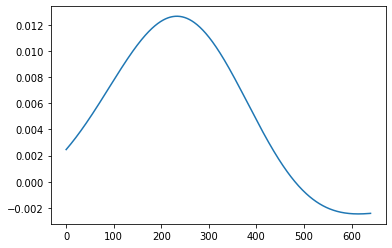

In [8]:
import matplotlib.pyplot as plt
t = np.linspace(0,a.size,a.size)
plt.plot(t,np.real(a))

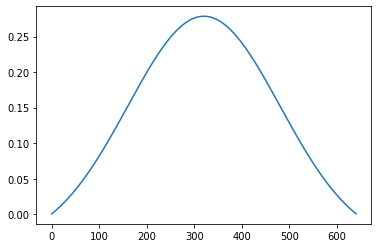

In [9]:
plt.plot(t,np.imag(a))

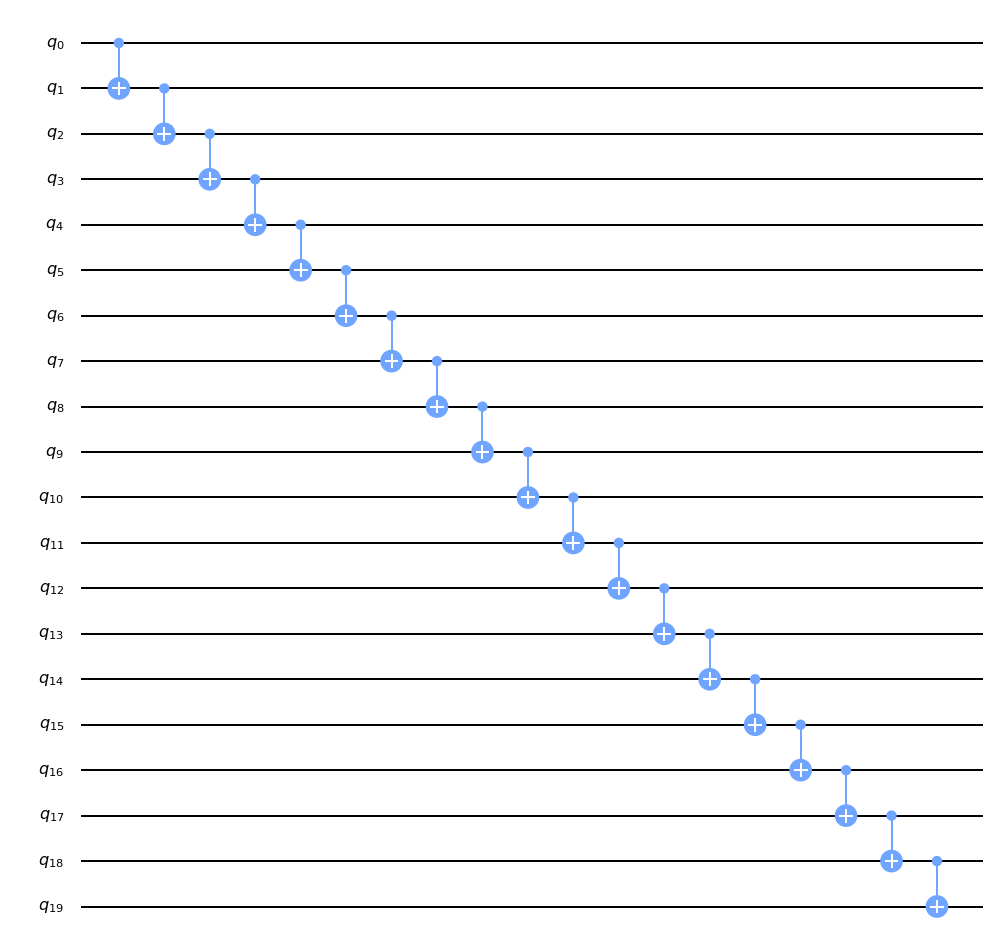

In [11]:
n = 20
circ = QuantumCircuit(n)
circ.cx(range(0,n-1),range(1,n))
#circ.measure_all()
circ.draw('mpl')

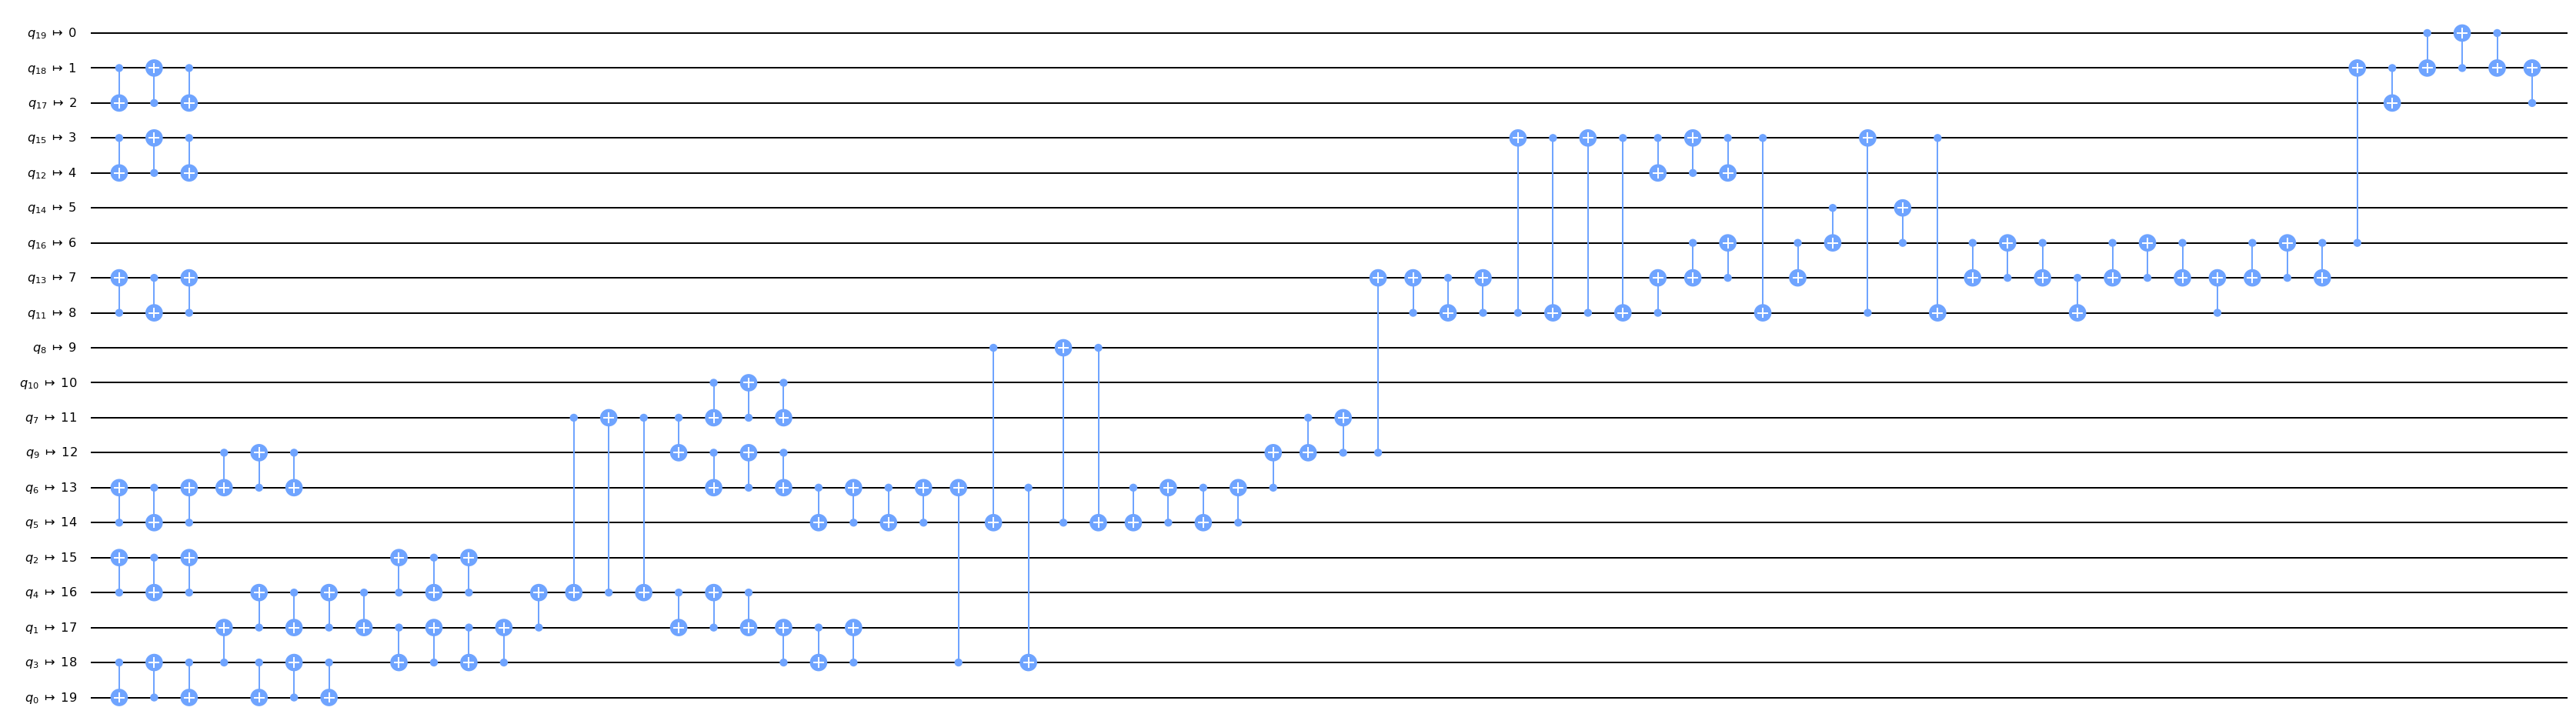

In [13]:
backend =FakeAlmaden()
transpiled_circ = transpile(circ, backend)
transpiled_circ.draw('mpl',fold=100)

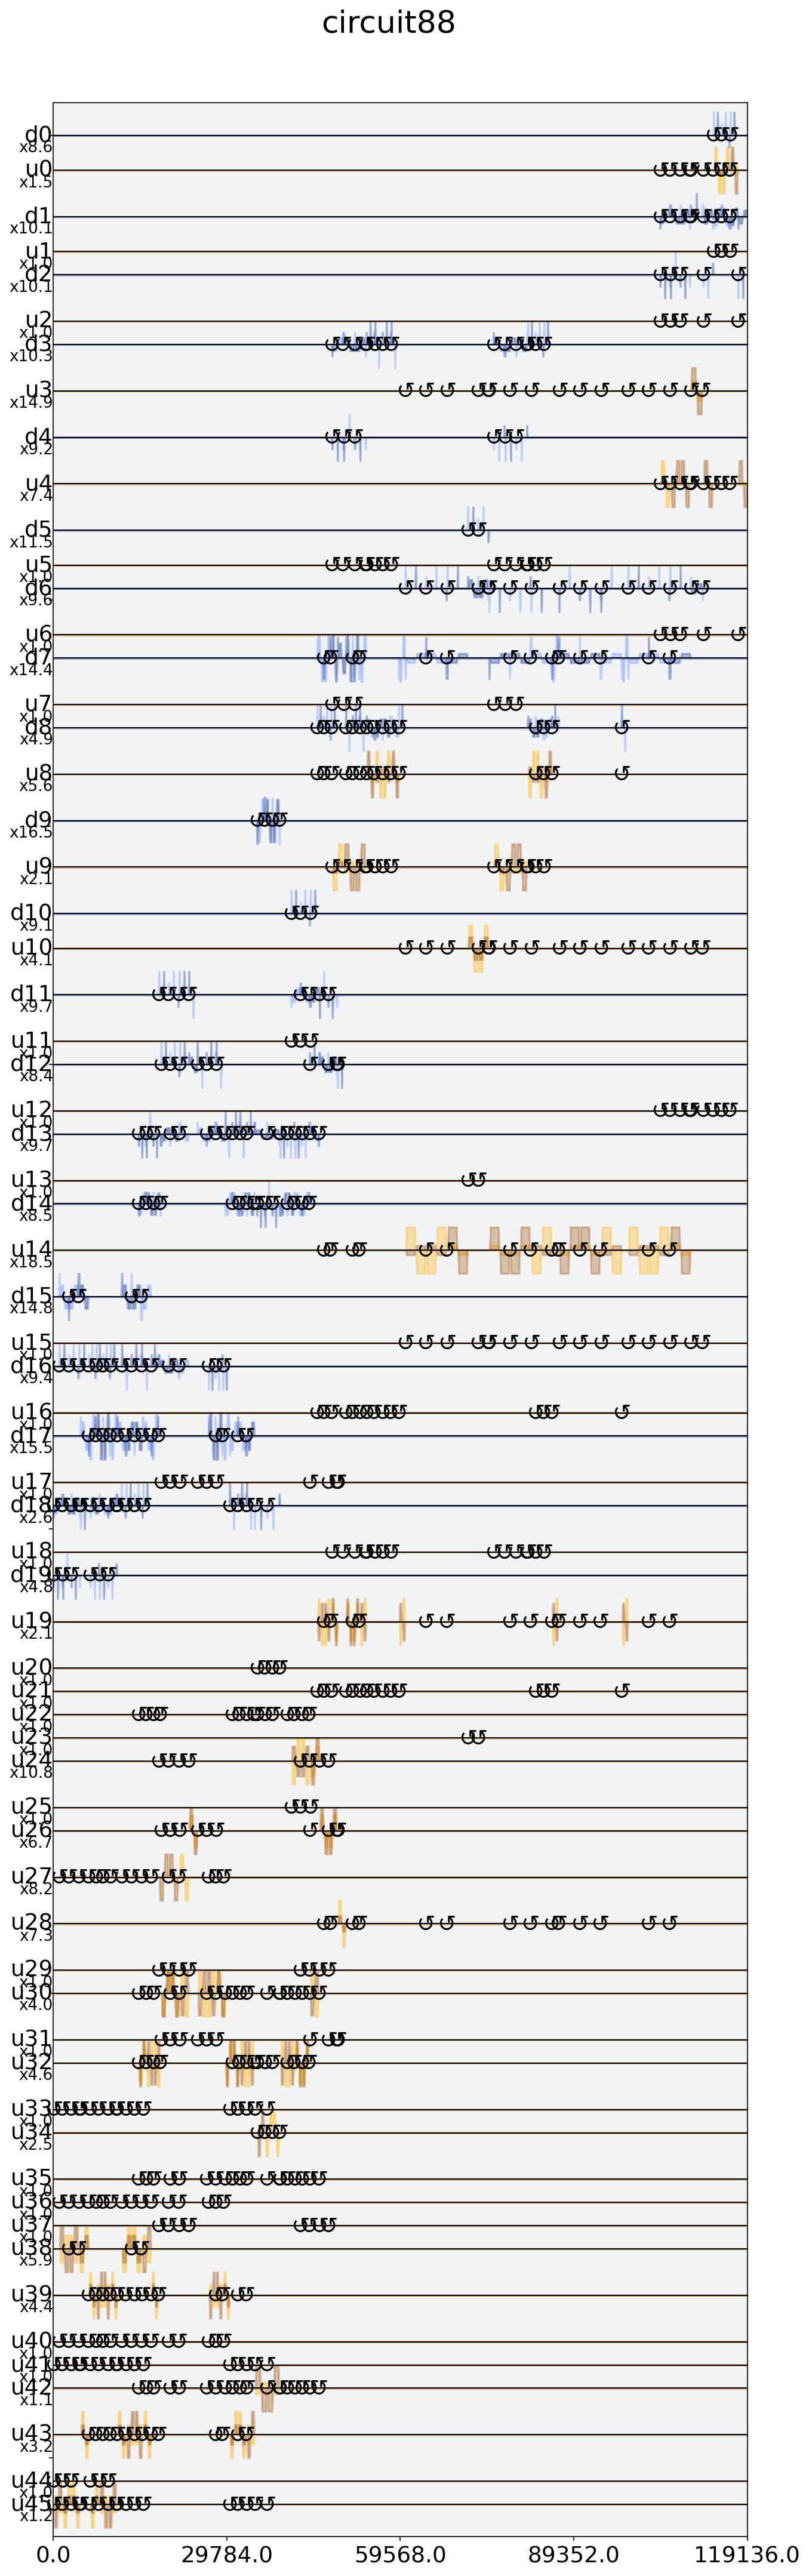

In [18]:
style = SchedStyle(figsize=(10.0, 36.0))
schedule = build_schedule(transpiled_circ, backend)
#schedule.draw(plot_range=[0,2500])
schedule.draw(style=style)

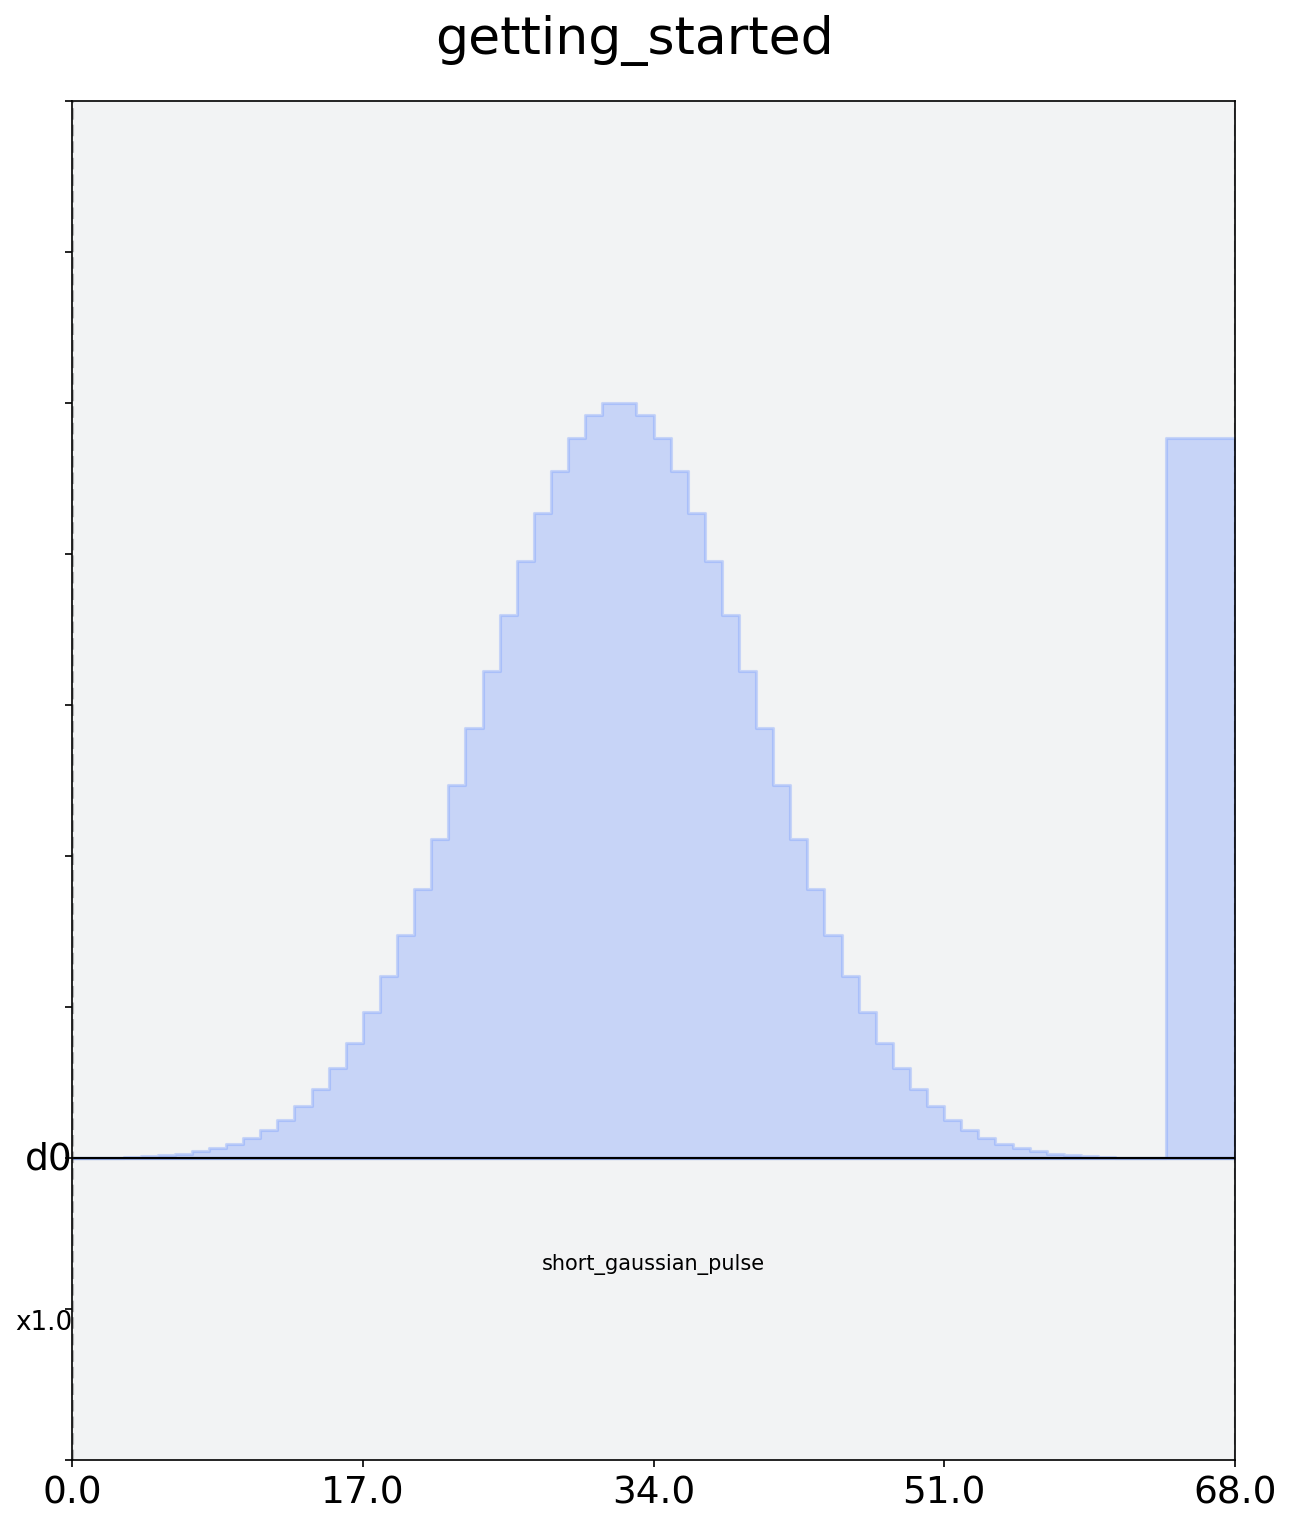

In [12]:
wf_list = [0.00043, 0.0007 , 0.00112, 0.00175, 0.00272, 0.00414, 0.00622,
                        0.00919, 0.01337, 0.01916, 0.02702, 0.03751, 0.05127, 0.06899,
                        0.09139, 0.1192 , 0.15306, 0.19348, 0.24079, 0.29502, 0.35587,
                        0.4226 , 0.49407, 0.56867, 0.64439, 0.71887, 0.78952, 0.85368,
                        0.90873, 0.95234, 0.98258, 0.99805, 0.99805, 0.98258, 0.95234,
                        0.90873, 0.85368, 0.78952, 0.71887, 0.64439, 0.56867, 0.49407,
                        0.4226 , 0.35587, 0.29502, 0.24079, 0.19348, 0.15306, 0.1192 ,
                        0.09139, 0.06899, 0.05127, 0.03751, 0.02702, 0.01916, 0.01337,
                        0.00919, 0.00622, 0.00414, 0.00272, 0.00175, 0.00112, 0.0007 ,
                        0.00043, 0.95234, 0.95234, 0.95234, 0.95234]


wf_list2 = [i/0.99805 for i in wf_list]

my_pulse = Waveform(wf_list2, name="short_gaussian_pulse")

sched = Schedule(name='getting_started')
qubit_idx = 0
sched = sched.insert(0, Play(my_pulse, DriveChannel(qubit_idx)))
sched.draw(label=True)

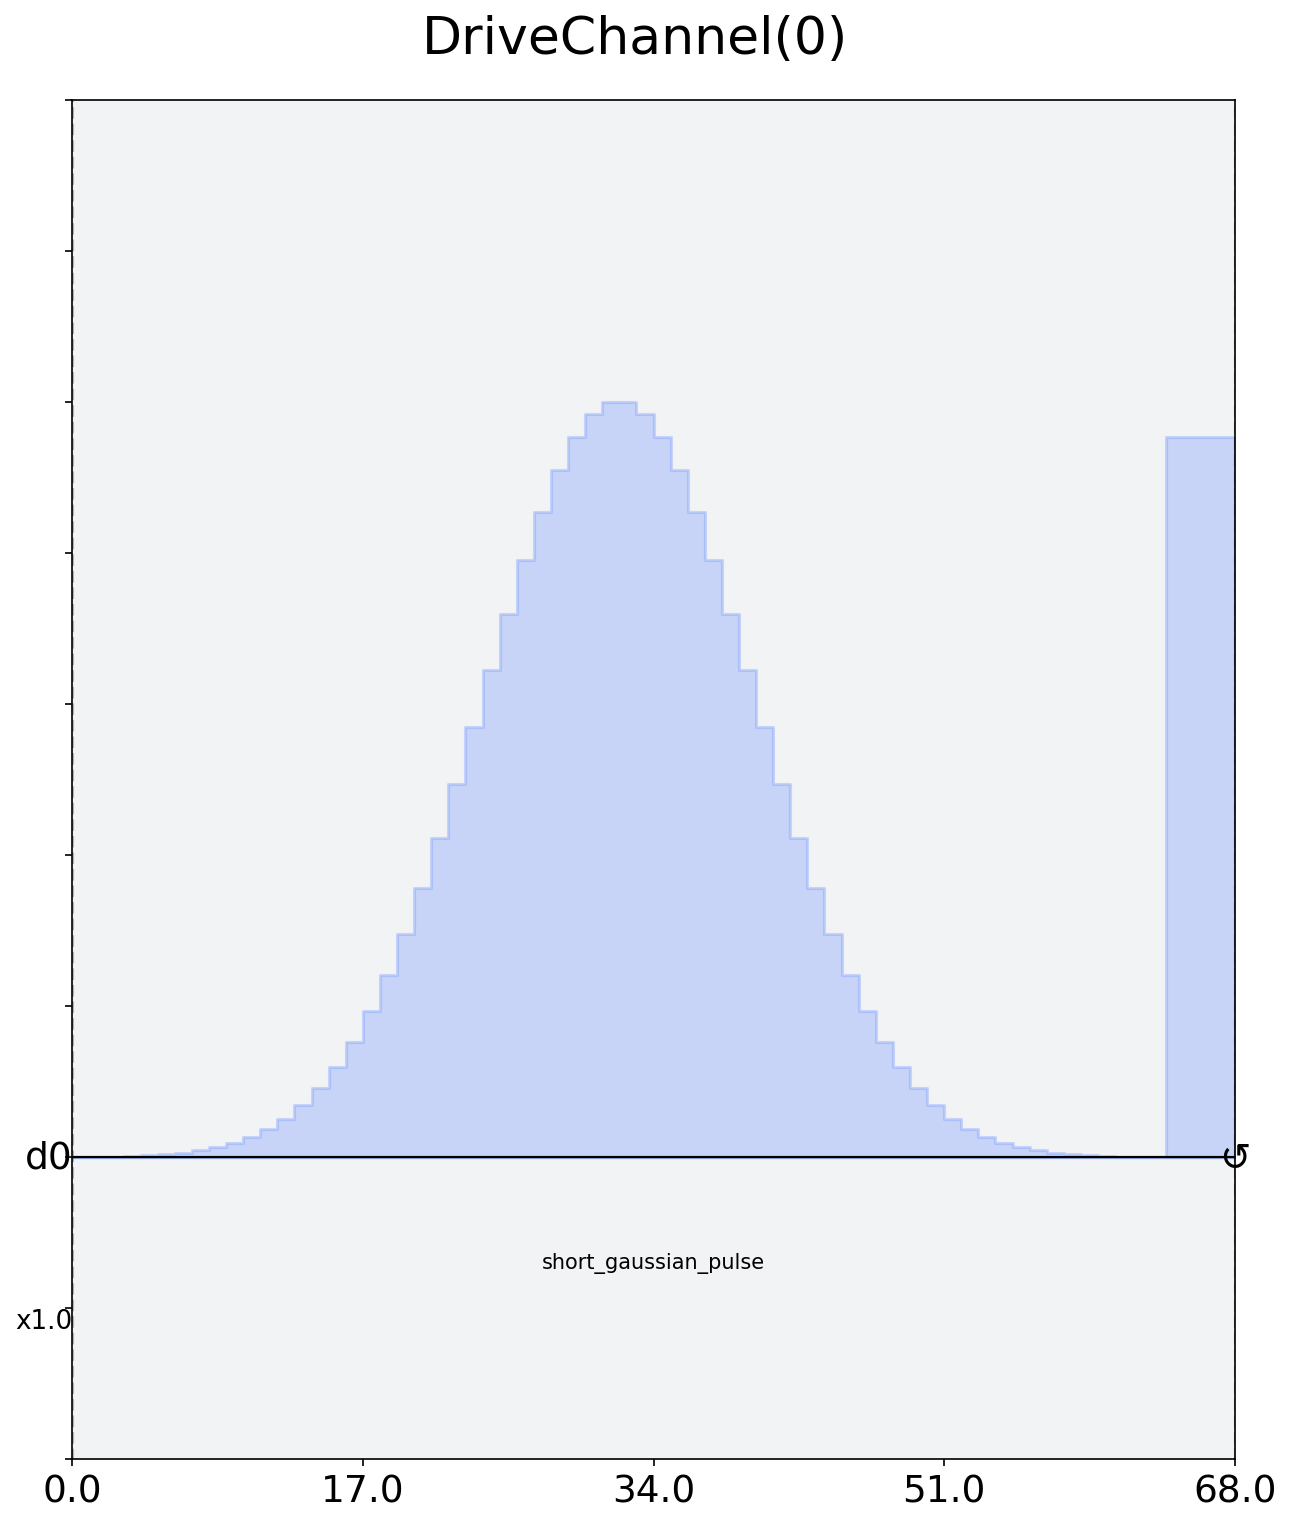

In [13]:
sched2 = sched.append(ShiftPhase(np.pi, DriveChannel(0)), DriveChannel(qubit_idx))
sched2 = sched.append(ShiftPhase(np.pi/2, DriveChannel(0)), DriveChannel(qubit_idx))
sched2.draw(label=True)

In [10]:
sched2

Schedule((0, Play(Waveform(array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.565653

In [11]:
len(wf_list)

68

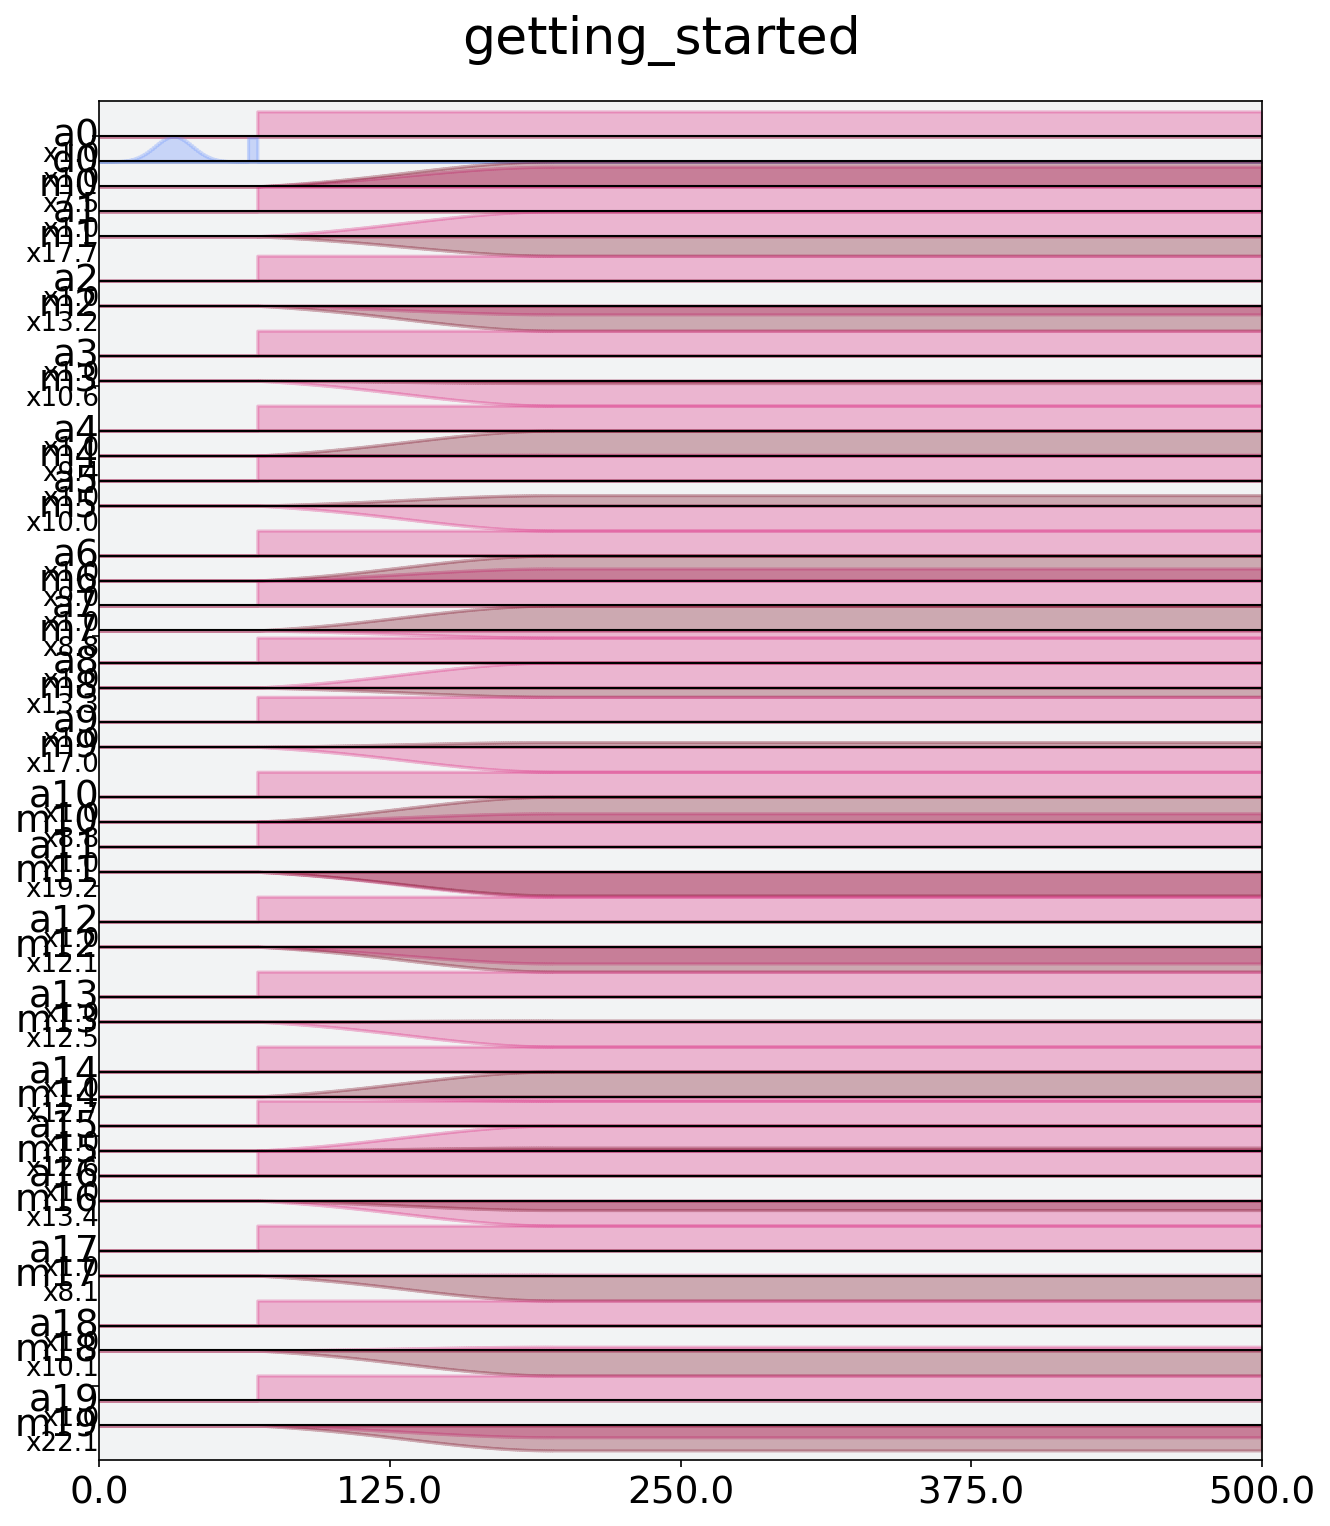

In [6]:
backend = FakeAlmaden()
sched = sched.insert(sched.duration, measure_all(backend))
sched.draw(plot_range=[0, 500])

In [15]:
sched

Schedule((0, Play(Waveform(array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.565653

In [8]:
for start_time, instruction in sched.instructions:
    for channel in instruction.channels:
        print(channel)

DriveChannel(0)
AcquireChannel(0)
MemorySlot(0)
AcquireChannel(1)
MemorySlot(1)
AcquireChannel(10)
MemorySlot(10)
AcquireChannel(11)
MemorySlot(11)
AcquireChannel(12)
MemorySlot(12)
AcquireChannel(13)
MemorySlot(13)
AcquireChannel(14)
MemorySlot(14)
AcquireChannel(15)
MemorySlot(15)
AcquireChannel(16)
MemorySlot(16)
AcquireChannel(17)
MemorySlot(17)
AcquireChannel(18)
MemorySlot(18)
AcquireChannel(19)
MemorySlot(19)
AcquireChannel(2)
MemorySlot(2)
AcquireChannel(3)
MemorySlot(3)
AcquireChannel(4)
MemorySlot(4)
AcquireChannel(5)
MemorySlot(5)
AcquireChannel(6)
MemorySlot(6)
AcquireChannel(7)
MemorySlot(7)
AcquireChannel(8)
MemorySlot(8)
AcquireChannel(9)
MemorySlot(9)
MeasureChannel(0)
MeasureChannel(1)
MeasureChannel(10)
MeasureChannel(11)
MeasureChannel(12)
MeasureChannel(13)
MeasureChannel(14)
MeasureChannel(15)
MeasureChannel(16)
MeasureChannel(17)
MeasureChannel(18)
MeasureChannel(19)
MeasureChannel(2)
MeasureChannel(3)
MeasureChannel(4)
MeasureChannel(5)
MeasureChannel(6)
MeasureC

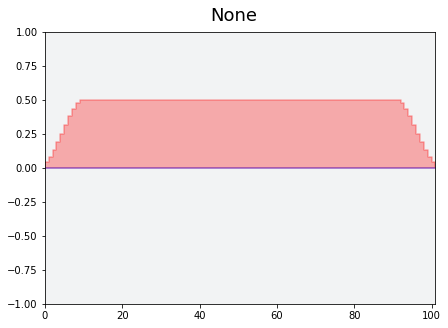

In [13]:
num_samples = 101
amp = 0.5
sigma = 5

pulse = GaussianSquare(num_samples, amp, sigma, width = 81, name="Parametric Gaus")
pulse.draw()

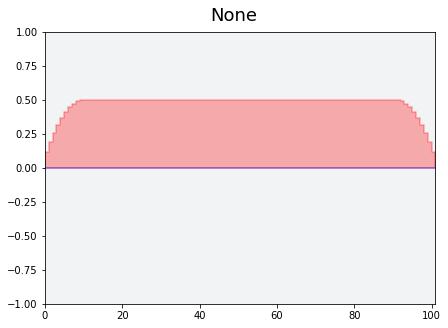

In [12]:
num_samples = 101
amp = 0.5
sigma = 20

pulse = GaussianSquare(num_samples, amp, sigma, width = 81, name="Parametric Gaus")
pulse.draw()

In [6]:
a_set = set()
b_list = ['ff','a','b','c','kk','b','fg','b']
a_set.update(b_list)
a_set

{'a', 'b', 'c', 'ff', 'fg', 'kk'}

In [7]:
a_set

{'a', 'b', 'c', 'ff', 'fg', 'kk'}

In [20]:
aaaa = dict()
bbbb = dict()
cccc = dict()

output_channels = {**aaaa, **bbbb, **cccc}
channels = {**output_channels}

In [22]:
aaaa['hello'] = 3

In [23]:
aaaa

{'hello': 3}

In [24]:
output_channels

{}

In [14]:
a = Schedule((0, Play(Waveform(np.array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j,
       2.41260458e-01+0.j, 1.93858023e-01+0.j, 1.53359050e-01+0.j,
       1.19432894e-01+0.j, 9.15685587e-02+0.j, 6.91247933e-02+0.j,
       5.13701718e-02+0.j, 3.75832874e-02+0.j, 2.70727919e-02+0.j,
       1.91974350e-02+0.j, 1.33961224e-02+0.j, 9.20795551e-03+0.j,
       6.23215270e-03+0.j, 4.14808877e-03+0.j, 2.72531436e-03+0.j,
       1.75341917e-03+0.j, 1.12218827e-03+0.j, 7.01367667e-04+0.j,
       4.30840138e-04+0.j, 9.54200691e-01+0.j, 9.54200691e-01+0.j,
       9.54200691e-01+0.j, 9.54200691e-01+0.j]), name='short_gaussian_pulse'), DriveChannel(0), name='short_gaussian_pulse')), (68, ShiftPhase(1.5707963267948966, DriveChannel(0))), name="DriveChannel(0)")

In [15]:
a = Schedule((0, Play(Waveform(np.array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j,
       2.41260458e-01+0.j, 1.93858023e-01+0.j, 1.53359050e-01+0.j,
       1.19432894e-01+0.j, 9.15685587e-02+0.j, 6.91247933e-02+0.j,
       5.13701718e-02+0.j, 3.75832874e-02+0.j, 2.70727919e-02+0.j,
       1.91974350e-02+0.j, 1.33961224e-02+0.j, 9.20795551e-03+0.j,
       6.23215270e-03+0.j, 4.14808877e-03+0.j, 2.72531436e-03+0.j,
       1.75341917e-03+0.j, 1.12218827e-03+0.j, 7.01367667e-04+0.j,
       4.30840138e-04+0.j, 9.54200691e-01+0.j, 9.54200691e-01+0.j,
       9.54200691e-01+0.j, 9.54200691e-01+0.j]), name='short_gaussian_pulse'), DriveChannel(0), name='short_gaussian_pulse')), 
             (68, ShiftPhase(1.5707963267948966, DriveChannel(0))),
             (0, Play(Waveform(np.array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j,
       2.41260458e-01+0.j, 1.93858023e-01+0.j, 1.53359050e-01+0.j,
       1.19432894e-01+0.j, 9.15685587e-02+0.j, 6.91247933e-02+0.j,
       5.13701718e-02+0.j, 3.75832874e-02+0.j, 2.70727919e-02+0.j,
       1.91974350e-02+0.j, 1.33961224e-02+0.j, 9.20795551e-03+0.j,
       6.23215270e-03+0.j, 4.14808877e-03+0.j, 2.72531436e-03+0.j,
       1.75341917e-03+0.j, 1.12218827e-03+0.j, 7.01367667e-04+0.j,
       4.30840138e-04+0.j]), name='short_gaussian_pulse'), DriveChannel(1), name='short_gaussian_pulse')),name="HELLO")

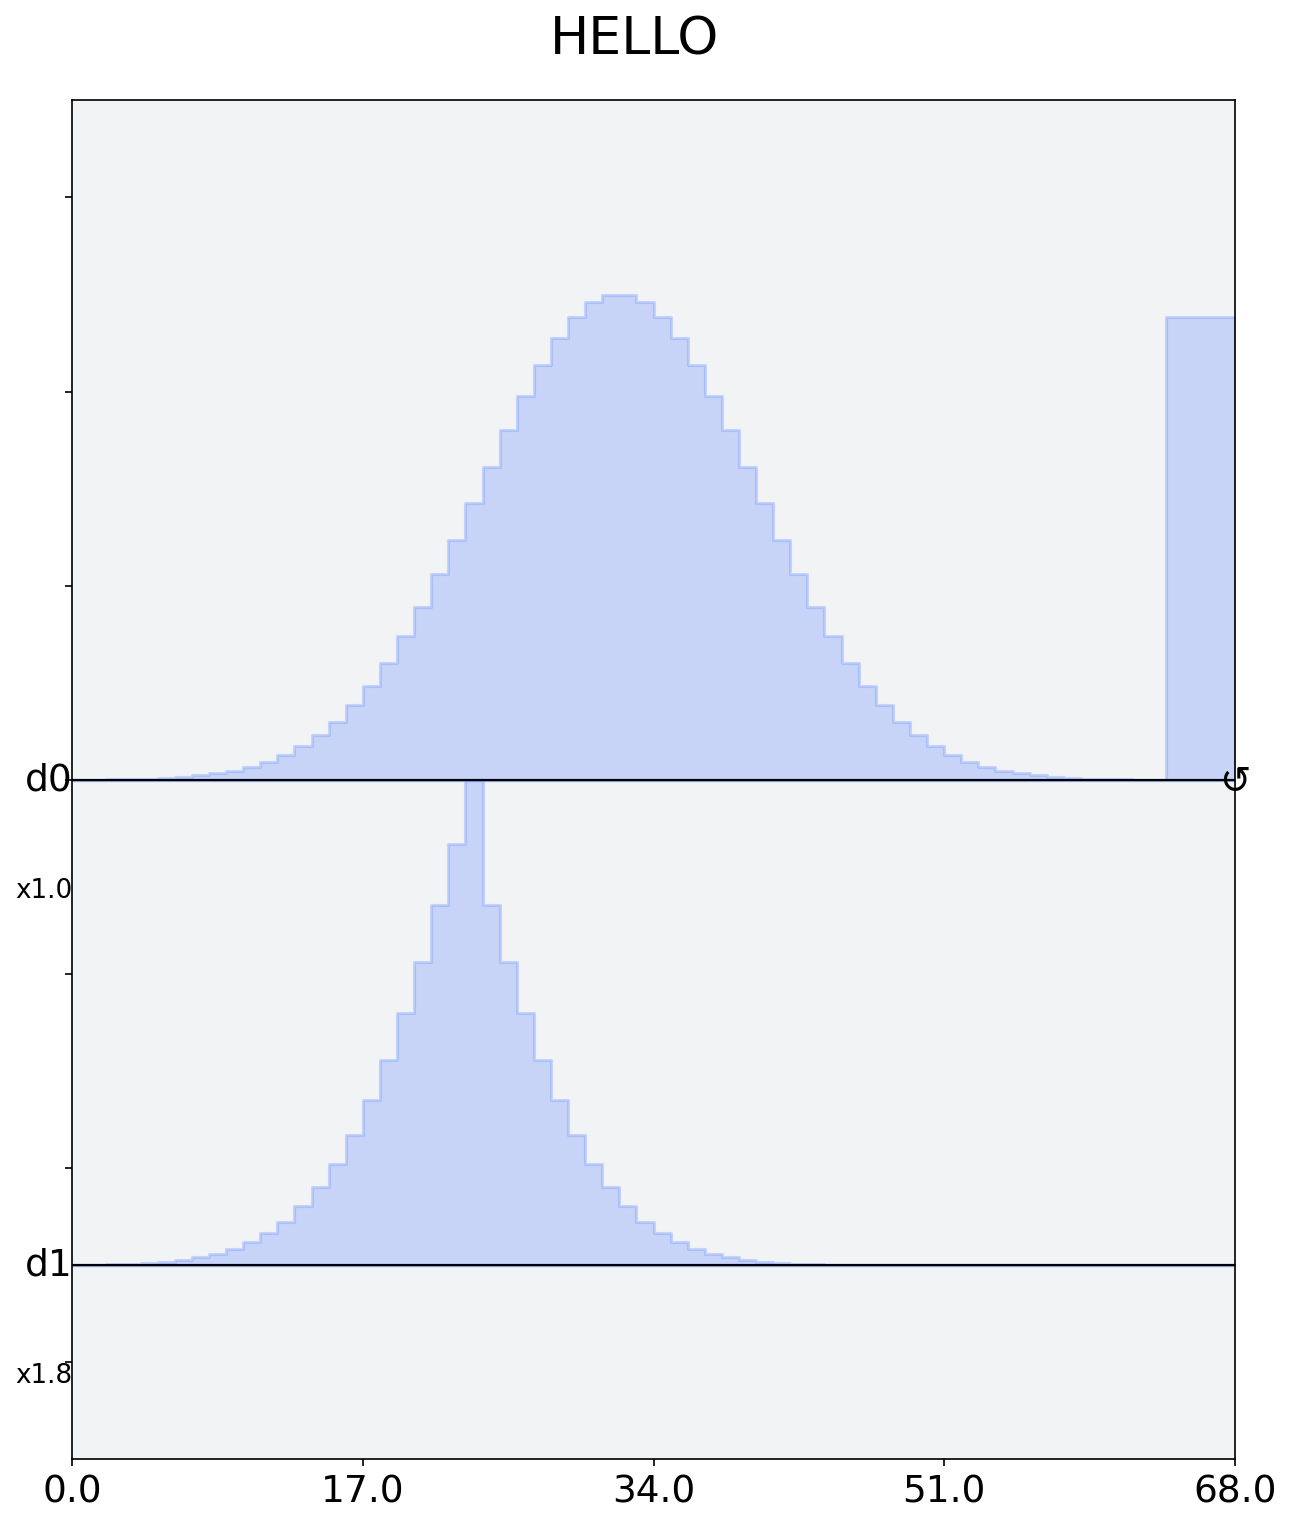

In [16]:
a.draw()

In [17]:
for start_time, instruction in a.instructions:
    for channel in instruction.channels:
        print(channel)

DriveChannel(1)
DriveChannel(0)
DriveChannel(0)


In [19]:
pulses = {}

for start_time, instruction in a.instructions:
    if isinstance(instruction, Play):
        pulse = instruction.pulse
        #print(pulse)
    else:
        pulse = instruction
    if start_time in pulses.keys():
        pulses[start_time].append(pulse)
    else:
        pulses[start_time] = [pulse]
        
print(pulses)

{0: [Waveform(array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j,
       2.41260458e-01+0.j, 1.93858023e-01+0.j, 1.53359050e-01+0.j,
       1.19432894e-01+0.j, 9.15685587e-02+0.j, 6.91247933e-02+0.j,
       5.13701718e-02+0.j, 3.75832874e-02+0.j, 2.70727919e-02+0.j,
       1.91974350e-02+0.j, 1.33961224e-02+0.j, 9.20795551e-03+0.j,
       6.23215270e-03+0.j, 4.14808877e-03+0.j, 2.72531436e-03+0.j,
       1.75341917e-03+0.j, 1.12218827e-03+0.j, 7

In [47]:
ppplay = Play(Waveform(np.array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j,
       2.41260458e-01+0.j, 1.93858023e-01+0.j, 1.53359050e-01+0.j,
       1.19432894e-01+0.j, 9.15685587e-02+0.j, 6.91247933e-02+0.j,
       5.13701718e-02+0.j, 3.75832874e-02+0.j, 2.70727919e-02+0.j,
       1.91974350e-02+0.j, 1.33961224e-02+0.j, 9.20795551e-03+0.j,
       6.23215270e-03+0.j, 4.14808877e-03+0.j, 2.72531436e-03+0.j,
       1.75341917e-03+0.j, 1.12218827e-03+0.j, 7.01367667e-04+0.j,
       4.30840138e-04+0.j, 9.54200691e-01+0.j, 9.54200691e-01+0.j,
       9.54200691e-01+0.j, 9.54200691e-01+0.j]), name='short_gaussian_pulse'), DriveChannel(0), name='short_gaussian_pulse')

In [50]:
ppplay.pulse

Waveform(array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.9559

In [55]:
ppphaseshift = ShiftPhase(1.5707963267948966, DriveChannel(0))
dir(ppphaseshift)

['__abstractmethods__',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_channel',
 '_channels',
 '_children',
 '_duration',
 '_hash',
 '_instructions',
 '_name',
 '_operands',
 '_phase',
 '_timeslots',
 'append',
 'ch_duration',
 'ch_start_time',
 'ch_stop_time',
 'channel',
 'channels',
 'command',
 'draw',
 'duration',
 'flatten',
 'id',
 'insert',
 'instructions',
 'name',
 'operands',
 'phase',
 'shift',
 'start_time',
 'stop_time',
 'timeslots']

In [61]:
ppphaseshift

ShiftPhase(1.5707963267948966, DriveChannel(0))

In [70]:
for start_time, instruction in a.instructions:
    if isinstance(instruction, Play):
        print(start_time, instruction.channels)

0 (DriveChannel(1),)
0 (DriveChannel(0),)


In [4]:
a = tuple()

In [8]:
a

()

In [15]:
a += (1,2,3)

In [17]:
a = ((0,('Hello0','Goodbye0')),(1,('Hello1','Goodbye1')),(2,('Hello2','Goodbye2')))
a

((0, ('Hello0', 'Goodbye0')),
 (1, ('Hello1', 'Goodbye1')),
 (2, ('Hello2', 'Goodbye2')))

In [18]:
b = list(a)
b

[(0, ('Hello0', 'Goodbye0')),
 (1, ('Hello1', 'Goodbye1')),
 (2, ('Hello2', 'Goodbye2'))]

In [21]:
hellos = ['Hello0','Hello1','Hello2']
goodbs = ['Goodbye0','Goodbye1','Goodbye2']
nums = [0,1,2]

zips = zip(nums,zip(hellos,goodbs))
unzip

((0, ('Hello0', 'Goodbye0')),
 (1, ('Hello1', 'Goodbye1')),
 (2, ('Hello2', 'Goodbye2')))

In [23]:
a = list()
if len(a):
    

0

In [27]:
if 2:
    print('hi')

hi


In [32]:
a = [[str,np.array([[],[]])],]
a

[[str, array([], shape=(2, 0), dtype=float64)]]

In [39]:
type(a[0][0])

int

In [40]:
a = [['d0',np.array([[0,13],[1.57,1.3]])],['d1',np.array([[0,13],[2.22,0.75]])],['d2',np.array([[0,13],[1.57,1.3]])]]
a

[['d0',
  array([[ 0.  , 13.  ],
         [ 1.57,  1.3 ]])],
 ['d1',
  array([[ 0.  , 13.  ],
         [ 2.22,  0.75]])],
 ['d2',
  array([[ 0.  , 13.  ],
         [ 1.57,  1.3 ]])]]

In [41]:
if 'd0' in a:
    print('hi')

In [45]:
a[:][0]

['d0',
 array([[ 0.  , 13.  ],
        [ 1.57,  1.3 ]])]

In [59]:
a = {'d0':np.array([[0,13],[1.57,1.3]]),'d1':np.array([[0,13],[2.22,0.75]]),'d2':np.array([[0,13],[1.57,1.3]])}
a

{'d0': array([[ 0.  , 13.  ],
        [ 1.57,  1.3 ]]),
 'd1': array([[ 0.  , 13.  ],
        [ 2.22,  0.75]]),
 'd2': array([[ 0.  , 13.  ],
        [ 1.57,  1.3 ]])}

In [64]:
if 'd0' in a.keys():
    print('hi')

hi


In [54]:
a

{'d0': array([[ 9.  , 22.  ],
        [ 1.57,  1.3 ]]),
 'd1': array([[ 0.  , 13.  ],
        [ 2.22,  0.75]]),
 'd2': array([[ 0.  , 13.  ],
        [ 1.57,  1.3 ]])}

In [58]:
a = {str:np.array([]),}
a['one']=np.array([0,1])
a

{str: array([], dtype=float64), 'one': array([0, 1])}

In [82]:
bbb = np.array([[0,13],[22,33],[66,44],[1.57,1.3]])
bbb

array([[ 0.  , 13.  ],
       [22.  , 33.  ],
       [66.  , 44.  ],
       [ 1.57,  1.3 ]])

In [83]:
bbb[-1][0]

1.57

In [86]:
np.concatenate((bbb,np.array([[33,4]])))


array([[ 0.  , 13.  ],
       [22.  , 33.  ],
       [66.  , 44.  ],
       [ 1.57,  1.3 ],
       [33.  ,  4.  ]])

In [90]:
ccc = [[0,1],[1,2],[3,4]]
ccc

[[0, 1], [1, 2], [3, 4]]

In [91]:
ccc += [[5,4]]

In [95]:
ccc

[[0, 1], [1, 2], [3, 4], [6, 7]]

In [96]:
ccc[-1] = [[6,7]]
ccc

[[0, 1], [1, 2], [3, 4], [[6, 7]]]

In [9]:
ppplay0 = Play(Waveform(np.array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j,
       2.41260458e-01+0.j, 1.93858023e-01+0.j, 1.53359050e-01+0.j,
       1.19432894e-01+0.j, 9.15685587e-02+0.j, 6.91247933e-02+0.j,
       5.13701718e-02+0.j, 3.75832874e-02+0.j, 2.70727919e-02+0.j,
       1.91974350e-02+0.j, 1.33961224e-02+0.j, 9.20795551e-03+0.j,
       6.23215270e-03+0.j, 4.14808877e-03+0.j, 2.72531436e-03+0.j,
       1.75341917e-03+0.j, 1.12218827e-03+0.j, 7.01367667e-04+0.j,
       4.30840138e-04+0.j, 9.54200691e-01+0.j, 9.54200691e-01+0.j,
       9.54200691e-01+0.j, 9.54200691e-01+0.j]), name='short_gaussian_pulse'), DriveChannel(0), name='short_gaussian_pulse')

In [10]:
ppplay1 = Play(Waveform(np.array([
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j,
       2.41260458e-01+0.j, 1.93858023e-01+0.j, 1.53359050e-01+0.j,
       1.19432894e-01+0.j, 9.15685587e-02+0.j, 6.91247933e-02+0.j]), name='shorter_gaussian_pulse'), DriveChannel(1), name='shorter_gaussian_pulse')

In [18]:
a = Schedule((0, Play(Waveform(np.array([4.30840138e-04+0.j, 7.01367667e-04+0.j, 1.12218827e-03+0.j,
       1.75341917e-03+0.j, 2.72531436e-03+0.j, 4.14808877e-03+0.j,
       6.23215270e-03+0.j, 9.20795551e-03+0.j, 1.33961224e-02+0.j,
       1.91974350e-02+0.j, 2.70727919e-02+0.j, 3.75832874e-02+0.j,
       5.13701718e-02+0.j, 6.91247933e-02+0.j, 9.15685587e-02+0.j,
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       6.45649016e-01+0.j, 7.20274535e-01+0.j, 7.91062572e-01+0.j,
       8.55347928e-01+0.j, 9.10505486e-01+0.j, 9.54200691e-01+0.j,
       9.84499775e-01+0.j, 1.00000000e+00+0.j, 1.00000000e+00+0.j,
       9.84499775e-01+0.j, 9.54200691e-01+0.j, 9.10505486e-01+0.j,
       8.55347928e-01+0.j, 7.91062572e-01+0.j, 7.20274535e-01+0.j,
       6.45649016e-01+0.j, 5.69781073e-01+0.j, 4.95035319e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j,
       2.41260458e-01+0.j, 1.93858023e-01+0.j, 1.53359050e-01+0.j,
       1.19432894e-01+0.j, 9.15685587e-02+0.j, 6.91247933e-02+0.j,
       5.13701718e-02+0.j, 3.75832874e-02+0.j, 2.70727919e-02+0.j,
       1.91974350e-02+0.j, 1.33961224e-02+0.j, 9.20795551e-03+0.j,
       6.23215270e-03+0.j, 4.14808877e-03+0.j, 2.72531436e-03+0.j,
       1.75341917e-03+0.j, 1.12218827e-03+0.j, 7.01367667e-04+0.j,
       4.30840138e-04+0.j, 9.54200691e-01+0.j, 9.54200691e-01+0.j,
       9.54200691e-01+0.j, 9.54200691e-01+0.j]), name='short_gaussian_pulse'), DriveChannel(0), name='short_gaussian_pulse')), 
             (68, ShiftPhase(1.5707963267948966, DriveChannel(0))),
             (0, Play(Waveform(np.array([
       1.19432894e-01+0.j, 1.53359050e-01+0.j, 1.93858023e-01+0.j,
       2.41260458e-01+0.j, 2.95596413e-01+0.j, 3.56565302e-01+0.j,
       4.23425680e-01+0.j, 4.95035319e-01+0.j, 5.69781073e-01+0.j,
       4.23425680e-01+0.j, 3.56565302e-01+0.j, 2.95596413e-01+0.j, 0, 0 , 0, 1]), name='short_gaussian_pulse'), DriveChannel(1), name='short_gaussian_pulse')),name="HELLO")

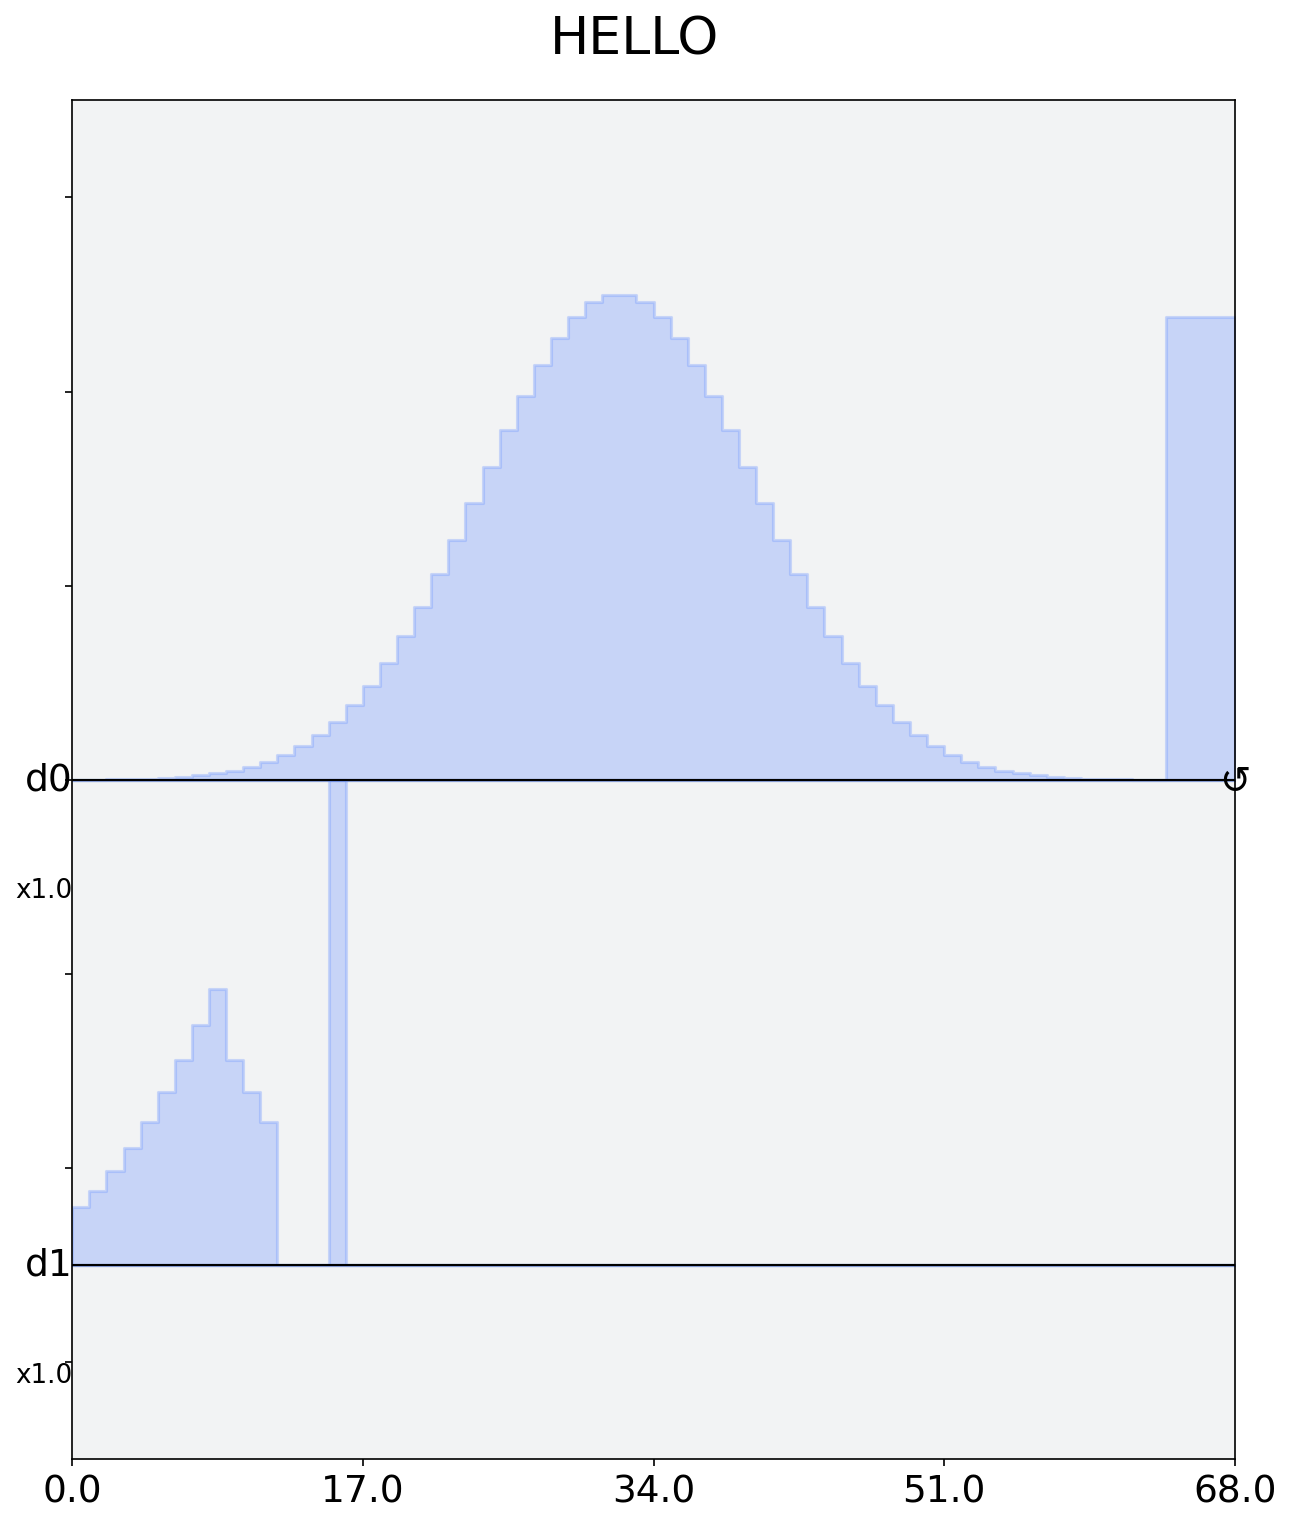

In [19]:
a.draw()

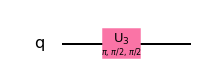

In [46]:
from qiskit import QuantumCircuit
from qiskit import transpile, schedule as build_schedule
from qiskit.test.mock import FakeArmonk, FakeAlmaden
from qiskit.pulse import Play, SetFrequency, ShiftPhase

gate_name = 'Y'
backend_name = 'Armonk'

circuit = QuantumCircuit(1)
if gate_name == 'X':
    circuit.x(0)
if gate_name == 'Y':
    circuit.y(0)
if gate_name == 'Z':
    circuit.z(0)
if gate_name == 'H':
    circuit.h(0)

if backend_name == 'Armonk':
    backend = FakeArmonk()
elif backend_name == 'Almaden':
    backend = FakeAlmaden()
else:
    '''TODO: There is no FakeCasablanca, so using FakeAlmaden for it right now'''
    backend = FakeAlmaden()

    
    
trans_circuit = transpile(circuit, backend)
trans_circuit.draw('mpl')

In [50]:
sch = build_schedule(trans_circuit, backend)
sch

Schedule((0, ShiftPhase(-1.5707963267948966, DriveChannel(0))), (0, Play(Waveform(array([0.00045668-2.45862314e-03j, 0.00100554-2.50128261e-03j,
       0.00155953-2.54421984e-03j, 0.00211868-2.58743390e-03j,
       0.002683  -2.63092411e-03j, 0.00325252-2.67468928e-03j,
       0.00382724-2.71872850e-03j, 0.00440721-2.76304106e-03j,
       0.00499242-2.80762557e-03j, 0.0055829 -2.85248109e-03j,
       0.00617868-2.89760670e-03j, 0.00677976-2.94300099e-03j,
       0.00738616-2.98866257e-03j, 0.0079979 -3.03459028e-03j,
       0.008615  -3.08078295e-03j, 0.00923747-3.12723918e-03j,
       0.00986533-3.17395735e-03j, 0.01049859-3.22093605e-03j,
       0.01113727-3.26817343e-03j, 0.01178138-3.31566879e-03j,
       0.01243094-3.36341979e-03j, 0.01308596-3.41142458e-03j,
       0.01374644-3.45968176e-03j, 0.01441241-3.50818969e-03j,
       0.01508388-3.55694629e-03j, 0.01576085-3.60594946e-03j,
       0.01644334-3.65519733e-03j, 0.01713135-3.70468851e-03j,
       0.0178249 -3.75441997e-03j, 0

In [44]:
for start_time, instruction in sch.instructions:
    if isinstance(instruction, ShiftPhase):
        print(instruction.phase)

-3.141592653589793
